In [50]:
from statsmodels.regression.rolling import RollingOLS
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np
import yfinance as yf
import pandas_ta
import warnings
warnings.filterwarnings('ignore')

nifty50=pd.read_csv(r'D:\unsupervised\ind_nifty50list.csv')
nifty50['Symbol']
symbols_list= nifty50['Symbol'].unique().tolist()
symbols_list


['ADANIENT.NS',
 'ADANIPORTS.NS',
 'APOLLOHOSP.NS',
 'ASIANPAINT.NS',
 'AXISBANK.NS',
 'BAJAJ-AUTO.NS',
 'BAJFINANCE.NS',
 'BAJAJFINSV.NS',
 'BPCL.NS',
 'BHARTIARTL.NS',
 'BRITANNIA.NS',
 'CIPLA.NS',
 'COALINDIA.NS',
 'DIVISLAB.NS',
 'DRREDDY.NS',
 'EICHERMOT.NS',
 'GRASIM.NS',
 'HCLTECH.NS',
 'HDFCBANK.NS',
 'HDFCLIFE.NS',
 'HEROMOTOCO.NS',
 'HINDALCO.NS',
 'HINDUNILVR.NS',
 'ICICIBANK.NS',
 'ITC.NS',
 'INDUSINDBK.NS',
 'INFY.NS',
 'JSWSTEEL.NS',
 'KOTAKBANK.NS',
 'LTIM.NS',
 'LT.NS',
 'M&M.NS',
 'MARUTI.NS',
 'NTPC.NS',
 'NESTLEIND.NS',
 'ONGC.NS',
 'POWERGRID.NS',
 'RELIANCE.NS',
 'SBILIFE.NS',
 'SBIN.NS',
 'SUNPHARMA.NS',
 'TCS.NS',
 'TATACONSUM.NS',
 'TATAMOTORS.NS',
 'TATASTEEL.NS',
 'TECHM.NS',
 'TITAN.NS',
 'UPL.NS',
 'ULTRACEMCO.NS',
 'WIPRO.NS']

In [51]:
from datetime import datetime
date = datetime.now()
end=date.date()
start = (pd.to_datetime(end) - pd.DateOffset(365 * 10)).date()
tickers = symbols_list
df = yf.download(tickers, start, end).stack()

df


[*********************100%%**********************]  50 of 50 completed


Adj Close         Close          High  \
Date                                                                 
2013-12-30 ADANIENT.NS       37.614292     40.809483     41.982037   
           ADANIPORTS.NS    149.106339    157.050003    161.649994   
           APOLLOHOSP.NS    914.302979    949.700012    961.700012   
           ASIANPAINT.NS    453.474762    487.850006    490.750000   
           AXISBANK.NS      246.858154    257.250000    261.200012   
...                                ...           ...           ...   
2023-12-26 TECHM.NS        1282.000000   1282.000000   1288.750000   
           TITAN.NS        3656.699951   3656.699951   3665.000000   
           ULTRACEMCO.NS  10018.650391  10018.650391  10054.799805   
           UPL.NS           586.099976    586.099976    595.000000   
           WIPRO.NS         470.100006    470.100006    475.799988   

                                  Low         Open      Volume  
Date                                                            
2013-12-30 ADANIENT.NS      40.502934    41.951382   5612941.0  
           ADANIPORTS.NS   156.300003   161.350006   1300968.0  
           APOLLOHOSP.NS   932.849976   948.450012    360277.0  
           ASIANPAINT.NS   483.450012   486.049988    493062.0  
           AXISBANK.NS     256.609985   260.000000   7064845.0  
...                               ...          ...         ...  
2023-12-26 TECHM.NS       1260.550049  1275.000000   1720830.0  
           TITAN.NS       3623.449951  3635.000000    526101.0  
           ULTRACEMCO.NS  9970.099609  9975.000000    226114.0  
           UPL.NS          585.000000   587.900024   3443852.0  
           WIPRO.NS        448.350006   454.000000  27314322.0  

[120692 rows x 6 columns]

In [52]:
df.index.names = ['date', 'ticker']
df.columns= df.columns.str.lower()

In [53]:
#Calculation of Garman-Klass volatility
df['garman_klass_vol'] =  (np.log(df['high'])-np.log(df['low']))**2/2-(2*np.log(2)-1)*((np.log(df['adj close'])-np.log(df['open'])))


In [54]:
df

adj close         close          high  \
date       ticker                                                    
2013-12-30 ADANIENT.NS       37.614292     40.809483     41.982037   
           ADANIPORTS.NS    149.106339    157.050003    161.649994   
           APOLLOHOSP.NS    914.302979    949.700012    961.700012   
           ASIANPAINT.NS    453.474762    487.850006    490.750000   
           AXISBANK.NS      246.858154    257.250000    261.200012   
...                                ...           ...           ...   
2023-12-26 TECHM.NS        1282.000000   1282.000000   1288.750000   
           TITAN.NS        3656.699951   3656.699951   3665.000000   
           ULTRACEMCO.NS  10018.650391  10018.650391  10054.799805   
           UPL.NS           586.099976    586.099976    595.000000   
           WIPRO.NS         470.100006    470.100006    475.799988   

                                  low         open      volume  \
date       ticker                                                
2013-12-30 ADANIENT.NS      40.502934    41.951382   5612941.0   
           ADANIPORTS.NS   156.300003   161.350006   1300968.0   
           APOLLOHOSP.NS   932.849976   948.450012    360277.0   
           ASIANPAINT.NS   483.450012   486.049988    493062.0   
           AXISBANK.NS     256.609985   260.000000   7064845.0   
...                               ...          ...         ...   
2023-12-26 TECHM.NS       1260.550049  1275.000000   1720830.0   
           TITAN.NS       3623.449951  3635.000000    526101.0   
           ULTRACEMCO.NS  9970.099609  9975.000000    226114.0   
           UPL.NS          585.000000   587.900024   3443852.0   
           WIPRO.NS        448.350006   454.000000  27314322.0   

                          garman_klass_vol  
date       ticker                           
2013-12-30 ADANIENT.NS            0.042798  
           ADANIPORTS.NS          0.031051  
           APOLLOHOSP.NS          0.014628  
           ASIANPAINT.NS          0.026910  
           AXISBANK.NS            0.020193  
...                                    ...  
2023-12-26 TECHM.NS              -0.001870  
           TITAN.NS              -0.002234  
           ULTRACEMCO.NS         -0.001651  
           UPL.NS                 0.001328  
           WIPRO.NS              -0.011696  

[120692 rows x 7 columns]

In [55]:

#Caculation of RSI
df['rsi']= df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.rsi(close=x, length=20))


In [56]:
df

adj close         close          high  \
date       ticker                                                    
2013-12-30 ADANIENT.NS       37.614292     40.809483     41.982037   
           ADANIPORTS.NS    149.106339    157.050003    161.649994   
           APOLLOHOSP.NS    914.302979    949.700012    961.700012   
           ASIANPAINT.NS    453.474762    487.850006    490.750000   
           AXISBANK.NS      246.858154    257.250000    261.200012   
...                                ...           ...           ...   
2023-12-26 TECHM.NS        1282.000000   1282.000000   1288.750000   
           TITAN.NS        3656.699951   3656.699951   3665.000000   
           ULTRACEMCO.NS  10018.650391  10018.650391  10054.799805   
           UPL.NS           586.099976    586.099976    595.000000   
           WIPRO.NS         470.100006    470.100006    475.799988   

                                  low         open      volume  \
date       ticker                                                
2013-12-30 ADANIENT.NS      40.502934    41.951382   5612941.0   
           ADANIPORTS.NS   156.300003   161.350006   1300968.0   
           APOLLOHOSP.NS   932.849976   948.450012    360277.0   
           ASIANPAINT.NS   483.450012   486.049988    493062.0   
           AXISBANK.NS     256.609985   260.000000   7064845.0   
...                               ...          ...         ...   
2023-12-26 TECHM.NS       1260.550049  1275.000000   1720830.0   
           TITAN.NS       3623.449951  3635.000000    526101.0   
           ULTRACEMCO.NS  9970.099609  9975.000000    226114.0   
           UPL.NS          585.000000   587.900024   3443852.0   
           WIPRO.NS        448.350006   454.000000  27314322.0   

                          garman_klass_vol        rsi  
date       ticker                                      
2013-12-30 ADANIENT.NS            0.042798        NaN  
           ADANIPORTS.NS          0.031051        NaN  
           APOLLOHOSP.NS          0.014628        NaN  
           ASIANPAINT.NS          0.026910        NaN  
           AXISBANK.NS            0.020193        NaN  
...                                    ...        ...  
2023-12-26 TECHM.NS              -0.001870  61.578922  
           TITAN.NS              -0.002234  67.671729  
           ULTRACEMCO.NS         -0.001651  71.214420  
           UPL.NS                 0.001328  51.170923  
           WIPRO.NS              -0.011696  73.368546  

[120692 rows x 8 columns]

In [57]:
#ATR
def compute_atr(stock_data):
    atr=pandas_ta.atr(high=stock_data['high'],
              low=stock_data['low'],
              close=stock_data['close'],
              length=14)
    return atr.sub(atr.mean()).div(atr.std())

df['atr'] = df.groupby(level=1, group_keys=False).apply(compute_atr)

In [58]:
df.index.names = ['date', 'ticker']

In [59]:
df

adj close         close          high  \
date       ticker                                                    
2013-12-30 ADANIENT.NS       37.614292     40.809483     41.982037   
           ADANIPORTS.NS    149.106339    157.050003    161.649994   
           APOLLOHOSP.NS    914.302979    949.700012    961.700012   
           ASIANPAINT.NS    453.474762    487.850006    490.750000   
           AXISBANK.NS      246.858154    257.250000    261.200012   
...                                ...           ...           ...   
2023-12-26 TECHM.NS        1282.000000   1282.000000   1288.750000   
           TITAN.NS        3656.699951   3656.699951   3665.000000   
           ULTRACEMCO.NS  10018.650391  10018.650391  10054.799805   
           UPL.NS           586.099976    586.099976    595.000000   
           WIPRO.NS         470.100006    470.100006    475.799988   

                                  low         open      volume  \
date       ticker                                                
2013-12-30 ADANIENT.NS      40.502934    41.951382   5612941.0   
           ADANIPORTS.NS   156.300003   161.350006   1300968.0   
           APOLLOHOSP.NS   932.849976   948.450012    360277.0   
           ASIANPAINT.NS   483.450012   486.049988    493062.0   
           AXISBANK.NS     256.609985   260.000000   7064845.0   
...                               ...          ...         ...   
2023-12-26 TECHM.NS       1260.550049  1275.000000   1720830.0   
           TITAN.NS       3623.449951  3635.000000    526101.0   
           ULTRACEMCO.NS  9970.099609  9975.000000    226114.0   
           UPL.NS          585.000000   587.900024   3443852.0   
           WIPRO.NS        448.350006   454.000000  27314322.0   

                          garman_klass_vol        rsi       atr  
date       ticker                                                
2013-12-30 ADANIENT.NS            0.042798        NaN       NaN  
           ADANIPORTS.NS          0.031051        NaN       NaN  
           APOLLOHOSP.NS          0.014628        NaN       NaN  
           ASIANPAINT.NS          0.026910        NaN       NaN  
           AXISBANK.NS            0.020193        NaN       NaN  
...                                    ...        ...       ...  
2023-12-26 TECHM.NS              -0.001870  61.578922  1.175284  
           TITAN.NS              -0.002234  67.671729  1.570096  
           ULTRACEMCO.NS         -0.001651  71.214420  1.442106  
           UPL.NS                 0.001328  51.170923 -0.506179  
           WIPRO.NS              -0.011696  73.368546  1.507192  

[120692 rows x 9 columns]

In [60]:
def compute_macd(close):
    macd= pandas_ta.macd(close=close, length=20).iloc[:,0]
    return macd.sub(macd.mean()).div(macd.std())

df['macd'] = df.groupby(level=1, group_keys=False)['adj close'].apply(compute_macd)

In [61]:
df

adj close         close          high  \
date       ticker                                                    
2013-12-30 ADANIENT.NS       37.614292     40.809483     41.982037   
           ADANIPORTS.NS    149.106339    157.050003    161.649994   
           APOLLOHOSP.NS    914.302979    949.700012    961.700012   
           ASIANPAINT.NS    453.474762    487.850006    490.750000   
           AXISBANK.NS      246.858154    257.250000    261.200012   
...                                ...           ...           ...   
2023-12-26 TECHM.NS        1282.000000   1282.000000   1288.750000   
           TITAN.NS        3656.699951   3656.699951   3665.000000   
           ULTRACEMCO.NS  10018.650391  10018.650391  10054.799805   
           UPL.NS           586.099976    586.099976    595.000000   
           WIPRO.NS         470.100006    470.100006    475.799988   

                                  low         open      volume  \
date       ticker                                                
2013-12-30 ADANIENT.NS      40.502934    41.951382   5612941.0   
           ADANIPORTS.NS   156.300003   161.350006   1300968.0   
           APOLLOHOSP.NS   932.849976   948.450012    360277.0   
           ASIANPAINT.NS   483.450012   486.049988    493062.0   
           AXISBANK.NS     256.609985   260.000000   7064845.0   
...                               ...          ...         ...   
2023-12-26 TECHM.NS       1260.550049  1275.000000   1720830.0   
           TITAN.NS       3623.449951  3635.000000    526101.0   
           ULTRACEMCO.NS  9970.099609  9975.000000    226114.0   
           UPL.NS          585.000000   587.900024   3443852.0   
           WIPRO.NS        448.350006   454.000000  27314322.0   

                          garman_klass_vol        rsi       atr      macd  
date       ticker                                                          
2013-12-30 ADANIENT.NS            0.042798        NaN       NaN       NaN  
           ADANIPORTS.NS          0.031051        NaN       NaN       NaN  
           APOLLOHOSP.NS          0.014628        NaN       NaN       NaN  
           ASIANPAINT.NS          0.026910        NaN       NaN       NaN  
           AXISBANK.NS            0.020193        NaN       NaN       NaN  
...                                    ...        ...       ...       ...  
2023-12-26 TECHM.NS              -0.001870  61.578922  1.175284  1.189586  
           TITAN.NS              -0.002234  67.671729  1.570096  2.098310  
           ULTRACEMCO.NS         -0.001651  71.214420  1.442106  3.653876  
           UPL.NS                 0.001328  51.170923 -0.506179  0.199265  
           WIPRO.NS              -0.011696  73.368546  1.507192  2.044505  

[120692 rows x 10 columns]

In [62]:
df['bb_low'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,0])
df['bb_mid'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,1])
df['bb_high'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,2])

In [63]:
df

adj close         close          high  \
date       ticker                                                    
2013-12-30 ADANIENT.NS       37.614292     40.809483     41.982037   
           ADANIPORTS.NS    149.106339    157.050003    161.649994   
           APOLLOHOSP.NS    914.302979    949.700012    961.700012   
           ASIANPAINT.NS    453.474762    487.850006    490.750000   
           AXISBANK.NS      246.858154    257.250000    261.200012   
...                                ...           ...           ...   
2023-12-26 TECHM.NS        1282.000000   1282.000000   1288.750000   
           TITAN.NS        3656.699951   3656.699951   3665.000000   
           ULTRACEMCO.NS  10018.650391  10018.650391  10054.799805   
           UPL.NS           586.099976    586.099976    595.000000   
           WIPRO.NS         470.100006    470.100006    475.799988   

                                  low         open      volume  \
date       ticker                                                
2013-12-30 ADANIENT.NS      40.502934    41.951382   5612941.0   
           ADANIPORTS.NS   156.300003   161.350006   1300968.0   
           APOLLOHOSP.NS   932.849976   948.450012    360277.0   
           ASIANPAINT.NS   483.450012   486.049988    493062.0   
           AXISBANK.NS     256.609985   260.000000   7064845.0   
...                               ...          ...         ...   
2023-12-26 TECHM.NS       1260.550049  1275.000000   1720830.0   
           TITAN.NS       3623.449951  3635.000000    526101.0   
           ULTRACEMCO.NS  9970.099609  9975.000000    226114.0   
           UPL.NS          585.000000   587.900024   3443852.0   
           WIPRO.NS        448.350006   454.000000  27314322.0   

                          garman_klass_vol        rsi       atr      macd  \
date       ticker                                                           
2013-12-30 ADANIENT.NS            0.042798        NaN       NaN       NaN   
           ADANIPORTS.NS          0.031051        NaN       NaN       NaN   
           APOLLOHOSP.NS          0.014628        NaN       NaN       NaN   
           ASIANPAINT.NS          0.026910        NaN       NaN       NaN   
           AXISBANK.NS            0.020193        NaN       NaN       NaN   
...                                    ...        ...       ...       ...   
2023-12-26 TECHM.NS              -0.001870  61.578922  1.175284  1.189586   
           TITAN.NS              -0.002234  67.671729  1.570096  2.098310   
           ULTRACEMCO.NS         -0.001651  71.214420  1.442106  3.653876   
           UPL.NS                 0.001328  51.170923 -0.506179  0.199265   
           WIPRO.NS              -0.011696  73.368546  1.507192  2.044505   

                            bb_low    bb_mid   bb_high  
date       ticker                                       
2013-12-30 ADANIENT.NS         NaN       NaN       NaN  
           ADANIPORTS.NS       NaN       NaN       NaN  
           APOLLOHOSP.NS       NaN       NaN       NaN  
           ASIANPAINT.NS       NaN       NaN       NaN  
           AXISBANK.NS         NaN       NaN       NaN  
...                            ...       ...       ...  
2023-12-26 TECHM.NS       7.079265  7.125785  7.172306  
           TITAN.NS       8.142869  8.178993  8.215118  
           ULTRACEMCO.NS  9.071978  9.164434  9.256891  
           UPL.NS         6.331300  6.375803  6.420306  
           WIPRO.NS       5.968425  6.055964  6.143503  

[120692 rows x 13 columns]

In [64]:
df['rupee_volume']= (df['adj close']*df['volume'])/1e6

In [65]:
df

adj close         close          high  \
date       ticker                                                    
2013-12-30 ADANIENT.NS       37.614292     40.809483     41.982037   
           ADANIPORTS.NS    149.106339    157.050003    161.649994   
           APOLLOHOSP.NS    914.302979    949.700012    961.700012   
           ASIANPAINT.NS    453.474762    487.850006    490.750000   
           AXISBANK.NS      246.858154    257.250000    261.200012   
...                                ...           ...           ...   
2023-12-26 TECHM.NS        1282.000000   1282.000000   1288.750000   
           TITAN.NS        3656.699951   3656.699951   3665.000000   
           ULTRACEMCO.NS  10018.650391  10018.650391  10054.799805   
           UPL.NS           586.099976    586.099976    595.000000   
           WIPRO.NS         470.100006    470.100006    475.799988   

                                  low         open      volume  \
date       ticker                                                
2013-12-30 ADANIENT.NS      40.502934    41.951382   5612941.0   
           ADANIPORTS.NS   156.300003   161.350006   1300968.0   
           APOLLOHOSP.NS   932.849976   948.450012    360277.0   
           ASIANPAINT.NS   483.450012   486.049988    493062.0   
           AXISBANK.NS     256.609985   260.000000   7064845.0   
...                               ...          ...         ...   
2023-12-26 TECHM.NS       1260.550049  1275.000000   1720830.0   
           TITAN.NS       3623.449951  3635.000000    526101.0   
           ULTRACEMCO.NS  9970.099609  9975.000000    226114.0   
           UPL.NS          585.000000   587.900024   3443852.0   
           WIPRO.NS        448.350006   454.000000  27314322.0   

                          garman_klass_vol        rsi       atr      macd  \
date       ticker                                                           
2013-12-30 ADANIENT.NS            0.042798        NaN       NaN       NaN   
           ADANIPORTS.NS          0.031051        NaN       NaN       NaN   
           APOLLOHOSP.NS          0.014628        NaN       NaN       NaN   
           ASIANPAINT.NS          0.026910        NaN       NaN       NaN   
           AXISBANK.NS            0.020193        NaN       NaN       NaN   
...                                    ...        ...       ...       ...   
2023-12-26 TECHM.NS              -0.001870  61.578922  1.175284  1.189586   
           TITAN.NS              -0.002234  67.671729  1.570096  2.098310   
           ULTRACEMCO.NS         -0.001651  71.214420  1.442106  3.653876   
           UPL.NS                 0.001328  51.170923 -0.506179  0.199265   
           WIPRO.NS              -0.011696  73.368546  1.507192  2.044505   

                            bb_low    bb_mid   bb_high  rupee_volume  
date       ticker                                                     
2013-12-30 ADANIENT.NS         NaN       NaN       NaN    211.126803  
           ADANIPORTS.NS       NaN       NaN       NaN    193.982575  
           APOLLOHOSP.NS       NaN       NaN       NaN    329.402334  
           ASIANPAINT.NS       NaN       NaN       NaN    223.591173  
           AXISBANK.NS         NaN       NaN       NaN   1744.014597  
...                            ...       ...       ...           ...  
2023-12-26 TECHM.NS       7.079265  7.125785  7.172306   2206.104060  
           TITAN.NS       8.142869  8.178993  8.215118   1923.793501  
           ULTRACEMCO.NS  9.071978  9.164434  9.256891   2265.357114  
           UPL.NS         6.331300  6.375803  6.420306   2018.441573  
           WIPRO.NS       5.968425  6.055964  6.143503  12840.462939  

[120692 rows x 14 columns]

In [66]:
last_cols = [c for c in df.columns.unique(0) if c not in ['rupee_volume', 'volume', 'open', 'high', 'low', 'close']]
last_cols

['adj close',
 'garman_klass_vol',
 'rsi',
 'atr',
 'macd',
 'bb_low',
 'bb_mid',
 'bb_high']

In [67]:
data = (pd.concat([df.unstack('ticker')['rupee_volume'].resample('M').mean().stack('ticker').to_frame('rupee_volume'),
df.unstack()[last_cols].resample('M').last().stack('ticker')],axis=1)).dropna()
data

rupee_volume     adj close       atr   bb_high  \
date       ticker                                                          
2014-02-28 ADANIENT.NS      508.947562     35.918999 -0.617484  3.628089   
           ADANIPORTS.NS    284.936915    158.790421 -1.090122  5.095236   
           APOLLOHOSP.NS    107.061522    885.998840 -1.017698  6.824009   
           ASIANPAINT.NS    323.471489    439.671173 -1.349171  6.123686   
           AXISBANK.NS     1788.653654    243.173264 -1.827968  5.490603   
...                                ...           ...       ...       ...   
2023-12-31 TECHM.NS        3099.466254   1282.000000  1.175284  7.172306   
           TITAN.NS        2867.736329   3656.699951  1.570096  8.215118   
           ULTRACEMCO.NS   4949.057985  10018.650391  1.442106  9.256891   
           UPL.NS          1687.081098    586.099976 -0.506179  6.420306   
           WIPRO.NS        4560.788283    470.100006  1.507192  6.143503   

                            bb_low    bb_mid  garman_klass_vol      macd  \
date       ticker                                                          
2014-02-28 ADANIENT.NS    3.421817  3.524953          0.024383 -0.115961   
           ADANIPORTS.NS  4.878724  4.986980          0.006089  0.137387   
           APOLLOHOSP.NS  6.764064  6.794037          0.004834 -0.316445   
           ASIANPAINT.NS  6.061160  6.092423          0.032400 -0.344103   
           AXISBANK.NS    5.315727  5.403165          0.008105  0.032451   
...                            ...       ...               ...       ...   
2023-12-31 TECHM.NS       7.079265  7.125785         -0.001870  1.189586   
           TITAN.NS       8.142869  8.178993         -0.002234  2.098310   
           ULTRACEMCO.NS  9.071978  9.164434         -0.001651  3.653876   
           UPL.NS         6.331300  6.375803          0.001328  0.199265   
           WIPRO.NS       5.968425  6.055964         -0.011696  2.044505   

                                rsi  
date       ticker                    
2014-02-28 ADANIENT.NS    58.056415  
           ADANIPORTS.NS  63.348534  
           APOLLOHOSP.NS  47.754001  
           ASIANPAINT.NS  46.341875  
           AXISBANK.NS    65.029482  
...                             ...  
2023-12-31 TECHM.NS       61.578922  
           TITAN.NS       67.671729  
           ULTRACEMCO.NS  71.214420  
           UPL.NS         51.170923  
           WIPRO.NS       73.368546  

[5829 rows x 9 columns]

In [68]:
data['rupee_volume']=(data.loc[:,'rupee_volume'].unstack('ticker').rolling(5*12).mean().stack())
data

rupee_volume     adj close       atr   bb_high  \
date       ticker                                                          
2014-02-28 ADANIENT.NS             NaN     35.918999 -0.617484  3.628089   
           ADANIPORTS.NS           NaN    158.790421 -1.090122  5.095236   
           APOLLOHOSP.NS           NaN    885.998840 -1.017698  6.824009   
           ASIANPAINT.NS           NaN    439.671173 -1.349171  6.123686   
           AXISBANK.NS             NaN    243.173264 -1.827968  5.490603   
...                                ...           ...       ...       ...   
2023-12-31 TECHM.NS        2879.856883   1282.000000  1.175284  7.172306   
           TITAN.NS        3055.009408   3656.699951  1.570096  8.215118   
           ULTRACEMCO.NS   2670.272207  10018.650391  1.442106  9.256891   
           UPL.NS          2299.840260    586.099976 -0.506179  6.420306   
           WIPRO.NS        3158.937041    470.100006  1.507192  6.143503   

                            bb_low    bb_mid  garman_klass_vol      macd  \
date       ticker                                                          
2014-02-28 ADANIENT.NS    3.421817  3.524953          0.024383 -0.115961   
           ADANIPORTS.NS  4.878724  4.986980          0.006089  0.137387   
           APOLLOHOSP.NS  6.764064  6.794037          0.004834 -0.316445   
           ASIANPAINT.NS  6.061160  6.092423          0.032400 -0.344103   
           AXISBANK.NS    5.315727  5.403165          0.008105  0.032451   
...                            ...       ...               ...       ...   
2023-12-31 TECHM.NS       7.079265  7.125785         -0.001870  1.189586   
           TITAN.NS       8.142869  8.178993         -0.002234  2.098310   
           ULTRACEMCO.NS  9.071978  9.164434         -0.001651  3.653876   
           UPL.NS         6.331300  6.375803          0.001328  0.199265   
           WIPRO.NS       5.968425  6.055964         -0.011696  2.044505   

                                rsi  
date       ticker                    
2014-02-28 ADANIENT.NS    58.056415  
           ADANIPORTS.NS  63.348534  
           APOLLOHOSP.NS  47.754001  
           ASIANPAINT.NS  46.341875  
           AXISBANK.NS    65.029482  
...                             ...  
2023-12-31 TECHM.NS       61.578922  
           TITAN.NS       67.671729  
           ULTRACEMCO.NS  71.214420  
           UPL.NS         51.170923  
           WIPRO.NS       73.368546  

[5829 rows x 9 columns]

In [69]:
data['rupee_vol_rank'] = (data.groupby('date')['rupee_volume'].rank(ascending=False))


In [70]:
data=data[data['rupee_vol_rank']<20].drop(['rupee_volume', 'rupee_vol_rank'], axis=1)
data

adj close       atr   bb_high    bb_low    bb_mid  \
date       ticker                                                               
2019-01-31 AXISBANK.NS     719.971863  0.291123  6.552879  6.438385  6.495632   
           BHARTIARTL.NS   277.825043 -0.678003  5.753761  5.586665  5.670213   
           HCLTECH.NS      436.770050 -0.551202  6.080836  5.983294  6.032065   
           HDFCBANK.NS    1003.502258 -0.415888  6.949736  6.899883  6.924810   
           HINDALCO.NS     201.434555 -0.767850  5.324842  5.271494  5.298168   
...                               ...       ...       ...       ...       ...   
2023-12-31 RELIANCE.NS    2578.050049  0.272471  7.861478  7.762162  7.811820   
           SBIN.NS         638.049988  1.233841  6.513592  6.328189  6.420890   
           TATAMOTORS.NS   719.549988  0.655290  6.601320  6.548933  6.575126   
           TATASTEEL.NS    135.199997  0.838812  4.926641  4.844325  4.885483   
           TCS.NS         3795.550049  1.422750  8.275464  8.133498  8.204481   

                          garman_klass_vol      macd        rsi  
date       ticker                                                
2019-01-31 AXISBANK.NS           -0.010962  0.937831  69.773008  
           BHARTIARTL.NS          0.002723 -0.630423  45.105760  
           HCLTECH.NS             0.060382  0.041245  57.690402  
           HDFCBANK.NS            0.005134 -0.490665  47.788303  
           HINDALCO.NS            0.009217 -0.600665  46.687229  
...                                    ...       ...        ...  
2023-12-31 RELIANCE.NS           -0.001444  1.617341  70.221129  
           SBIN.NS                0.000523  2.145239  64.538178  
           TATAMOTORS.NS          0.004305  1.091741  59.590401  
           TATASTEEL.NS          -0.001357  1.160248  61.984352  
           TCS.NS                 0.002531  2.629082  63.946667  

[1140 rows x 8 columns]

In [71]:
def calculate_returns(df):
    outlier_cutoff = 0.005
    lags = [1, 2, 3, 6, 9, 12]
    for lag in lags:
        df[f'return_{lag}m'] = (df['adj close'].pct_change(lag).pipe(lambda x: x.clip(lower=x.quantile(outlier_cutoff),upper=x.quantile(1-outlier_cutoff))).add(1).pow(1/lag).sub(1))
        
    return df

data = data.groupby(level=1, group_keys=False).apply(calculate_returns).dropna()

data
        

adj close       atr   bb_high    bb_low    bb_mid  \
date       ticker                                                               
2020-01-31 AXISBANK.NS     727.449219 -0.271583  6.621164  6.570051  6.595607   
           BHARTIARTL.NS   490.265259  0.298491  6.276199  6.071828  6.174014   
           HDFCBANK.NS    1193.297241 -0.006501  7.145623  7.070289  7.107956   
           HINDALCO.NS     184.187531 -0.816728  5.366671  5.235501  5.301086   
           ICICIBANK.NS    516.735596 -0.156253  6.284865  6.238330  6.261597   
...                               ...       ...       ...       ...       ...   
2023-12-31 RELIANCE.NS    2578.050049  0.272471  7.861478  7.762162  7.811820   
           SBIN.NS         638.049988  1.233841  6.513592  6.328189  6.420890   
           TATAMOTORS.NS   719.549988  0.655290  6.601320  6.548933  6.575126   
           TATASTEEL.NS    135.199997  0.838812  4.926641  4.844325  4.885483   
           TCS.NS         3795.550049  1.422750  8.275464  8.133498  8.204481   

                          garman_klass_vol      macd        rsi  return_1m  \
date       ticker                                                            
2020-01-31 AXISBANK.NS            0.003967 -0.308228  48.139257  -0.032887   
           BHARTIARTL.NS          0.002622  1.280898  60.166851   0.089184   
           HDFCBANK.NS            0.012259 -0.979408  42.217069  -0.036003   
           HINDALCO.NS            0.022288 -0.673720  34.533764  -0.121552   
           ICICIBANK.NS           0.009983 -0.290208  49.180676  -0.024587   
...                                    ...       ...        ...        ...   
2023-12-31 RELIANCE.NS           -0.001444  1.617341  70.221129   0.084376   
           SBIN.NS                0.000523  2.145239  64.538178   0.129792   
           TATAMOTORS.NS          0.004305  1.091741  59.590401   0.018615   
           TATASTEEL.NS          -0.001357  1.160248  61.984352   0.057076   
           TCS.NS                 0.002531  2.629082  63.946667   0.088299   

                          return_2m  return_3m  return_6m  return_9m  \
date       ticker                                                      
2020-01-31 AXISBANK.NS    -0.006618  -0.003202   0.013204  -0.005426   
           BHARTIARTL.NS   0.059268   0.097441   0.066380   0.049897   
           HDFCBANK.NS    -0.019265  -0.001098   0.014725   0.007260   
           HINDALCO.NS    -0.027354   0.002566   0.000086  -0.008595   
           ICICIBANK.NS    0.012649   0.043173   0.036222   0.028971   
...                             ...        ...        ...        ...   
2023-12-31 RELIANCE.NS     0.061518   0.032087   0.002398   0.011650   
           SBIN.NS         0.062165   0.021531   0.018128   0.024364   
           TATAMOTORS.NS   0.069858   0.045187   0.032561   0.061787   
           TATASTEEL.NS    0.067017   0.016033   0.031873   0.032711   
           TCS.NS          0.061458   0.025490   0.024360   0.020363   

                          return_12m  
date       ticker                     
2020-01-31 AXISBANK.NS      0.000861  
           BHARTIARTL.NS    0.048468  
           HDFCBANK.NS      0.014540  
           HINDALCO.NS     -0.007431  
           ICICIBANK.NS     0.031201  
...                              ...  
2023-12-31 RELIANCE.NS      0.001298  
           SBIN.NS          0.004858  
           TATAMOTORS.NS    0.053100  
           TATASTEEL.NS     0.018043  
           TCS.NS           0.015600  

[849 rows x 14 columns]

In [72]:
factor_data= web.DataReader('F-F_Research_Data_5_Factors_2x3','famafrench', start='2010')[0].drop('RF', axis=1)
factor_data.index = factor_data.index.to_timestamp()
factor_data = factor_data.resample('M').last().div(100)
factor_data.index.name = 'date'
factor_data = factor_data.join(data['return_1m']).sort_index()
factor_data

Mkt-RF     SMB     HML     RMW     CMA  return_1m
date       ticker                                                          
2020-01-31 AXISBANK.NS   -0.0011 -0.0438 -0.0625 -0.0117 -0.0232  -0.032887
           BHARTIARTL.NS -0.0011 -0.0438 -0.0625 -0.0117 -0.0232   0.089184
           HDFCBANK.NS   -0.0011 -0.0438 -0.0625 -0.0117 -0.0232  -0.036003
           HINDALCO.NS   -0.0011 -0.0438 -0.0625 -0.0117 -0.0232  -0.121552
           ICICIBANK.NS  -0.0011 -0.0438 -0.0625 -0.0117 -0.0232  -0.024587
...                          ...     ...     ...     ...     ...        ...
2023-11-30 RELIANCE.NS    0.0884 -0.0010  0.0165 -0.0389 -0.0099   0.039141
           SBIN.NS        0.0884 -0.0010  0.0165 -0.0389 -0.0099  -0.001415
           TATAMOTORS.NS  0.0884 -0.0010  0.0165 -0.0389 -0.0099   0.123678
           TATASTEEL.NS   0.0884 -0.0010  0.0165 -0.0389 -0.0099   0.077053
           TCS.NS         0.0884 -0.0010  0.0165 -0.0389 -0.0099   0.035280

[832 rows x 6 columns]

In [73]:
observations=factor_data.groupby(level=1).size()
valid_stocks=observations[observations >=10]
factor_data = factor_data[factor_data.index.get_level_values('ticker').isin(valid_stocks.index)]
factor_data


Mkt-RF     SMB     HML     RMW     CMA  return_1m
date       ticker                                                          
2020-01-31 AXISBANK.NS   -0.0011 -0.0438 -0.0625 -0.0117 -0.0232  -0.032887
           BHARTIARTL.NS -0.0011 -0.0438 -0.0625 -0.0117 -0.0232   0.089184
           HDFCBANK.NS   -0.0011 -0.0438 -0.0625 -0.0117 -0.0232  -0.036003
           ICICIBANK.NS  -0.0011 -0.0438 -0.0625 -0.0117 -0.0232  -0.024587
           INDUSINDBK.NS -0.0011 -0.0438 -0.0625 -0.0117 -0.0232  -0.166325
...                          ...     ...     ...     ...     ...        ...
2023-11-30 RELIANCE.NS    0.0884 -0.0010  0.0165 -0.0389 -0.0099   0.039141
           SBIN.NS        0.0884 -0.0010  0.0165 -0.0389 -0.0099  -0.001415
           TATAMOTORS.NS  0.0884 -0.0010  0.0165 -0.0389 -0.0099   0.123678
           TATASTEEL.NS   0.0884 -0.0010  0.0165 -0.0389 -0.0099   0.077053
           TCS.NS         0.0884 -0.0010  0.0165 -0.0389 -0.0099   0.035280

[820 rows x 6 columns]

In [74]:
betas = (factor_data.groupby(level=1, group_keys=False).apply (lambda x: RollingOLS(endog=x['return_1m'],exog=sm.add_constant(x.drop('return_1m', axis=1)),window=min(24, x.shape[0]),min_nobs=len(x.columns)+1).fit(params_only=True).params.drop('const', axis=1)))
betas

Mkt-RF       SMB       HML       RMW       CMA
date       ticker                                                         
2020-01-31 AXISBANK.NS         NaN       NaN       NaN       NaN       NaN
           BHARTIARTL.NS       NaN       NaN       NaN       NaN       NaN
           HDFCBANK.NS         NaN       NaN       NaN       NaN       NaN
           ICICIBANK.NS        NaN       NaN       NaN       NaN       NaN
           INDUSINDBK.NS       NaN       NaN       NaN       NaN       NaN
...                            ...       ...       ...       ...       ...
2023-11-30 RELIANCE.NS    0.370397 -0.143909 -0.597145 -0.186654  1.177689
           SBIN.NS        0.264033 -0.675573  0.584438  0.016487 -0.184188
           TATAMOTORS.NS  0.951626 -0.400007  0.824846 -0.056347 -0.909779
           TATASTEEL.NS   0.924732  0.416649 -0.346651 -0.354203  0.499657
           TCS.NS         0.499885  0.121262  0.003010  0.214515  0.115167

[820 rows x 5 columns]

In [75]:
data = (data.join(betas.groupby('ticker').shift()))
data

adj close       atr   bb_high    bb_low    bb_mid  \
date       ticker                                                               
2020-01-31 AXISBANK.NS     727.449219 -0.271583  6.621164  6.570051  6.595607   
           BHARTIARTL.NS   490.265259  0.298491  6.276199  6.071828  6.174014   
           HDFCBANK.NS    1193.297241 -0.006501  7.145623  7.070289  7.107956   
           HINDALCO.NS     184.187531 -0.816728  5.366671  5.235501  5.301086   
           ICICIBANK.NS    516.735596 -0.156253  6.284865  6.238330  6.261597   
...                               ...       ...       ...       ...       ...   
2023-12-31 RELIANCE.NS    2578.050049  0.272471  7.861478  7.762162  7.811820   
           SBIN.NS         638.049988  1.233841  6.513592  6.328189  6.420890   
           TATAMOTORS.NS   719.549988  0.655290  6.601320  6.548933  6.575126   
           TATASTEEL.NS    135.199997  0.838812  4.926641  4.844325  4.885483   
           TCS.NS         3795.550049  1.422750  8.275464  8.133498  8.204481   

                          garman_klass_vol      macd        rsi  return_1m  \
date       ticker                                                            
2020-01-31 AXISBANK.NS            0.003967 -0.308228  48.139257  -0.032887   
           BHARTIARTL.NS          0.002622  1.280898  60.166851   0.089184   
           HDFCBANK.NS            0.012259 -0.979408  42.217069  -0.036003   
           HINDALCO.NS            0.022288 -0.673720  34.533764  -0.121552   
           ICICIBANK.NS           0.009983 -0.290208  49.180676  -0.024587   
...                                    ...       ...        ...        ...   
2023-12-31 RELIANCE.NS           -0.001444  1.617341  70.221129   0.084376   
           SBIN.NS                0.000523  2.145239  64.538178   0.129792   
           TATAMOTORS.NS          0.004305  1.091741  59.590401   0.018615   
           TATASTEEL.NS          -0.001357  1.160248  61.984352   0.057076   
           TCS.NS                 0.002531  2.629082  63.946667   0.088299   

                          return_2m  return_3m  return_6m  return_9m  \
date       ticker                                                      
2020-01-31 AXISBANK.NS    -0.006618  -0.003202   0.013204  -0.005426   
           BHARTIARTL.NS   0.059268   0.097441   0.066380   0.049897   
           HDFCBANK.NS    -0.019265  -0.001098   0.014725   0.007260   
           HINDALCO.NS    -0.027354   0.002566   0.000086  -0.008595   
           ICICIBANK.NS    0.012649   0.043173   0.036222   0.028971   
...                             ...        ...        ...        ...   
2023-12-31 RELIANCE.NS     0.061518   0.032087   0.002398   0.011650   
           SBIN.NS         0.062165   0.021531   0.018128   0.024364   
           TATAMOTORS.NS   0.069858   0.045187   0.032561   0.061787   
           TATASTEEL.NS    0.067017   0.016033   0.031873   0.032711   
           TCS.NS          0.061458   0.025490   0.024360   0.020363   

                          return_12m  Mkt-RF  SMB  HML  RMW  CMA  
date       ticker                                                 
2020-01-31 AXISBANK.NS      0.000861     NaN  NaN  NaN  NaN  NaN  
           BHARTIARTL.NS    0.048468     NaN  NaN  NaN  NaN  NaN  
           HDFCBANK.NS      0.014540     NaN  NaN  NaN  NaN  NaN  
           HINDALCO.NS     -0.007431     NaN  NaN  NaN  NaN  NaN  
           ICICIBANK.NS     0.031201     NaN  NaN  NaN  NaN  NaN  
...                              ...     ...  ...  ...  ...  ...  
2023-12-31 RELIANCE.NS      0.001298     NaN  NaN  NaN  NaN  NaN  
           SBIN.NS          0.004858     NaN  NaN  NaN  NaN  NaN  
           TATAMOTORS.NS    0.053100     NaN  NaN  NaN  NaN  NaN  
           TATASTEEL.NS     0.018043     NaN  NaN  NaN  NaN  NaN  
           TCS.NS           0.015600     NaN  NaN  NaN  NaN  NaN  

[849 rows x 19 columns]

In [76]:
data

adj close       atr   bb_high    bb_low    bb_mid  \
date       ticker                                                               
2020-01-31 AXISBANK.NS     727.449219 -0.271583  6.621164  6.570051  6.595607   
           BHARTIARTL.NS   490.265259  0.298491  6.276199  6.071828  6.174014   
           HDFCBANK.NS    1193.297241 -0.006501  7.145623  7.070289  7.107956   
           HINDALCO.NS     184.187531 -0.816728  5.366671  5.235501  5.301086   
           ICICIBANK.NS    516.735596 -0.156253  6.284865  6.238330  6.261597   
...                               ...       ...       ...       ...       ...   
2023-12-31 RELIANCE.NS    2578.050049  0.272471  7.861478  7.762162  7.811820   
           SBIN.NS         638.049988  1.233841  6.513592  6.328189  6.420890   
           TATAMOTORS.NS   719.549988  0.655290  6.601320  6.548933  6.575126   
           TATASTEEL.NS    135.199997  0.838812  4.926641  4.844325  4.885483   
           TCS.NS         3795.550049  1.422750  8.275464  8.133498  8.204481   

                          garman_klass_vol      macd        rsi  return_1m  \
date       ticker                                                            
2020-01-31 AXISBANK.NS            0.003967 -0.308228  48.139257  -0.032887   
           BHARTIARTL.NS          0.002622  1.280898  60.166851   0.089184   
           HDFCBANK.NS            0.012259 -0.979408  42.217069  -0.036003   
           HINDALCO.NS            0.022288 -0.673720  34.533764  -0.121552   
           ICICIBANK.NS           0.009983 -0.290208  49.180676  -0.024587   
...                                    ...       ...        ...        ...   
2023-12-31 RELIANCE.NS           -0.001444  1.617341  70.221129   0.084376   
           SBIN.NS                0.000523  2.145239  64.538178   0.129792   
           TATAMOTORS.NS          0.004305  1.091741  59.590401   0.018615   
           TATASTEEL.NS          -0.001357  1.160248  61.984352   0.057076   
           TCS.NS                 0.002531  2.629082  63.946667   0.088299   

                          return_2m  return_3m  return_6m  return_9m  \
date       ticker                                                      
2020-01-31 AXISBANK.NS    -0.006618  -0.003202   0.013204  -0.005426   
           BHARTIARTL.NS   0.059268   0.097441   0.066380   0.049897   
           HDFCBANK.NS    -0.019265  -0.001098   0.014725   0.007260   
           HINDALCO.NS    -0.027354   0.002566   0.000086  -0.008595   
           ICICIBANK.NS    0.012649   0.043173   0.036222   0.028971   
...                             ...        ...        ...        ...   
2023-12-31 RELIANCE.NS     0.061518   0.032087   0.002398   0.011650   
           SBIN.NS         0.062165   0.021531   0.018128   0.024364   
           TATAMOTORS.NS   0.069858   0.045187   0.032561   0.061787   
           TATASTEEL.NS    0.067017   0.016033   0.031873   0.032711   
           TCS.NS          0.061458   0.025490   0.024360   0.020363   

                          return_12m  Mkt-RF  SMB  HML  RMW  CMA  
date       ticker                                                 
2020-01-31 AXISBANK.NS      0.000861     NaN  NaN  NaN  NaN  NaN  
           BHARTIARTL.NS    0.048468     NaN  NaN  NaN  NaN  NaN  
           HDFCBANK.NS      0.014540     NaN  NaN  NaN  NaN  NaN  
           HINDALCO.NS     -0.007431     NaN  NaN  NaN  NaN  NaN  
           ICICIBANK.NS     0.031201     NaN  NaN  NaN  NaN  NaN  
...                              ...     ...  ...  ...  ...  ...  
2023-12-31 RELIANCE.NS      0.001298     NaN  NaN  NaN  NaN  NaN  
           SBIN.NS          0.004858     NaN  NaN  NaN  NaN  NaN  
           TATAMOTORS.NS    0.053100     NaN  NaN  NaN  NaN  NaN  
           TATASTEEL.NS     0.018043     NaN  NaN  NaN  NaN  NaN  
           TCS.NS           0.015600     NaN  NaN  NaN  NaN  NaN  

[849 rows x 19 columns]

In [77]:
factors = ['Mkt-RF'	,'SMB'	,'HML'	,'RMW'	,'CMA']
data.loc[:, factors]= data.groupby('ticker', group_keys=False)[factors].apply(lambda x: x.fillna(x.mean()))

In [78]:
data=data.dropna()
data=data.drop('adj close', axis=1)

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 837 entries, (Timestamp('2020-01-31 00:00:00', freq='M'), 'AXISBANK.NS') to (Timestamp('2023-12-31 00:00:00', freq='M'), 'TCS.NS')
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   atr               837 non-null    float64
 1   bb_high           837 non-null    float64
 2   bb_low            837 non-null    float64
 3   bb_mid            837 non-null    float64
 4   garman_klass_vol  837 non-null    float64
 5   macd              837 non-null    float64
 6   rsi               837 non-null    float64
 7   return_1m         837 non-null    float64
 8   return_2m         837 non-null    float64
 9   return_3m         837 non-null    float64
 10  return_6m         837 non-null    float64
 11  return_9m         837 non-null    float64
 12  return_12m        837 non-null    float64
 13  Mkt-RF            837 non-null    float64
 14  SMB               837 non-nul

In [80]:
target_rsi_values = [30,40,50,60]
initial_centroids = np.zeros((len(target_rsi_values), 18))
initial_centroids[:, 6] = target_rsi_values 
initial_centroids


array([[ 0.,  0.,  0.,  0.,  0.,  0., 30.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 40.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 60.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.]])

In [81]:
# data = data.drop('cluster', axis=1)

In [82]:
from sklearn.cluster import KMeans

def get_clusters(df):
    df['cluster'] = KMeans(n_clusters=4, random_state=0, init=initial_centroids).fit(df).labels_
    
    return df

data=data.dropna().groupby('date', group_keys=False).apply(get_clusters)
data

atr   bb_high    bb_low    bb_mid  \
date       ticker                                                  
2020-01-31 AXISBANK.NS   -0.271583  6.621164  6.570051  6.595607   
           BHARTIARTL.NS  0.298491  6.276199  6.071828  6.174014   
           HDFCBANK.NS   -0.006501  7.145623  7.070289  7.107956   
           ICICIBANK.NS  -0.156253  6.284865  6.238330  6.261597   
           INDUSINDBK.NS  0.864983  7.336459  7.062653  7.199556   
...                            ...       ...       ...       ...   
2023-12-31 RELIANCE.NS    0.272471  7.861478  7.762162  7.811820   
           SBIN.NS        1.233841  6.513592  6.328189  6.420890   
           TATAMOTORS.NS  0.655290  6.601320  6.548933  6.575126   
           TATASTEEL.NS   0.838812  4.926641  4.844325  4.885483   
           TCS.NS         1.422750  8.275464  8.133498  8.204481   

                          garman_klass_vol      macd        rsi  return_1m  \
date       ticker                                                            
2020-01-31 AXISBANK.NS            0.003967 -0.308228  48.139257  -0.032887   
           BHARTIARTL.NS          0.002622  1.280898  60.166851   0.089184   
           HDFCBANK.NS            0.012259 -0.979408  42.217069  -0.036003   
           ICICIBANK.NS           0.009983 -0.290208  49.180676  -0.024587   
           INDUSINDBK.NS          0.005218 -2.137709  35.048358  -0.166325   
...                                    ...       ...        ...        ...   
2023-12-31 RELIANCE.NS           -0.001444  1.617341  70.221129   0.084376   
           SBIN.NS                0.000523  2.145239  64.538178   0.129792   
           TATAMOTORS.NS          0.004305  1.091741  59.590401   0.018615   
           TATASTEEL.NS          -0.001357  1.160248  61.984352   0.057076   
           TCS.NS                 0.002531  2.629082  63.946667   0.088299   

                          return_2m  return_3m  return_6m  return_9m  \
date       ticker                                                      
2020-01-31 AXISBANK.NS    -0.006618  -0.003202   0.013204  -0.005426   
           BHARTIARTL.NS   0.059268   0.097441   0.066380   0.049897   
           HDFCBANK.NS    -0.019265  -0.001098   0.014725   0.007260   
           ICICIBANK.NS    0.012649   0.043173   0.036222   0.028971   
           INDUSINDBK.NS  -0.104302  -0.013991  -0.018189  -0.026161   
...                             ...        ...        ...        ...   
2023-12-31 RELIANCE.NS     0.061518   0.032087   0.002398   0.011650   
           SBIN.NS         0.062165   0.021531   0.018128   0.024364   
           TATAMOTORS.NS   0.069858   0.045187   0.032561   0.061787   
           TATASTEEL.NS    0.067017   0.016033   0.031873   0.032711   
           TCS.NS          0.061458   0.025490   0.024360   0.020363   

                          return_12m    Mkt-RF       SMB       HML       RMW  \
date       ticker                                                              
2020-01-31 AXISBANK.NS      0.000861  0.933526 -0.202577  0.895004 -0.933423   
           BHARTIARTL.NS    0.048468  0.207123 -0.690571  0.138959 -0.711570   
           HDFCBANK.NS      0.014540  0.566504  0.198786  0.442604 -0.403055   
           ICICIBANK.NS     0.031201  0.833913 -0.583079  1.091667 -0.473695   
           INDUSINDBK.NS   -0.014370  1.056148  0.019049  1.227769 -1.513660   
...                              ...       ...       ...       ...       ...   
2023-12-31 RELIANCE.NS      0.001298  0.325624 -0.585635  0.254431 -0.779893   
           SBIN.NS          0.004858  0.693076 -0.457648  1.455869 -0.726635   
           TATAMOTORS.NS    0.053100  1.516963  0.020620  1.011660 -1.094195   
           TATASTEEL.NS     0.018043  1.467975 -0.262872  0.423980 -0.515633   
           TCS.NS           0.015600  0.301958  0.445443 -0.335830  0.114671   

                               CMA  cluster  
date       ticker                            
2020-01-31 AXISBANK.NS   -0.135693        2  
           BHAR

In [83]:
def plot_clusters(data):
    
    cluster_0 = data[data['cluster']==0]
    cluster_1 = data[data['cluster']==1]
    cluster_2 = data[data['cluster']==2]
    cluster_3 = data[data['cluster']==3]
    
    plt.scatter(cluster_0.iloc[:,0], cluster_0.iloc[:,6] , color = 'red', label = 'cluster 0')
    plt.scatter(cluster_1.iloc[:,0], cluster_1.iloc[:,6] , color = 'green', label = 'cluster 1')
    plt.scatter(cluster_2.iloc[:,0], cluster_2.iloc[:,6] , color = 'blue', label = 'cluster 2')
    plt.scatter(cluster_3.iloc[:,0], cluster_3.iloc[:,6] , color = 'yellow', label = 'cluster 3')
    
    plt.legend()
    plt.show()
    return

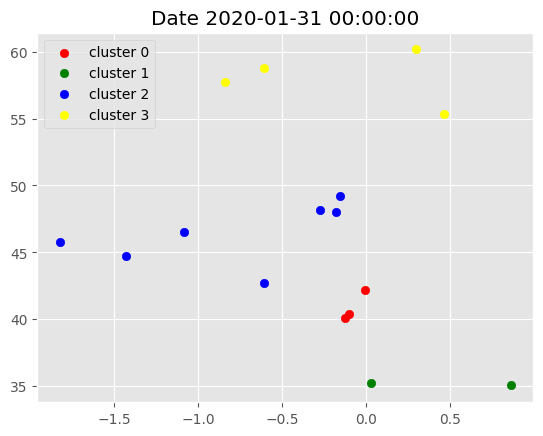

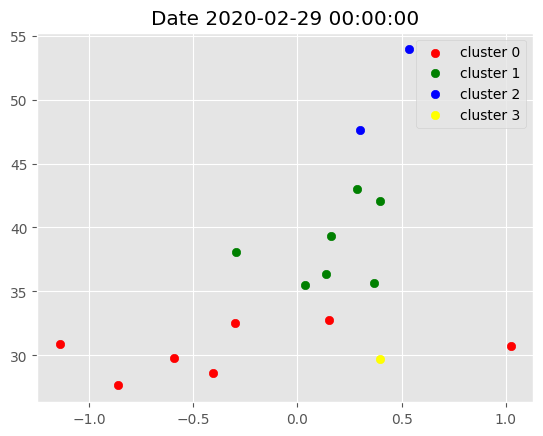

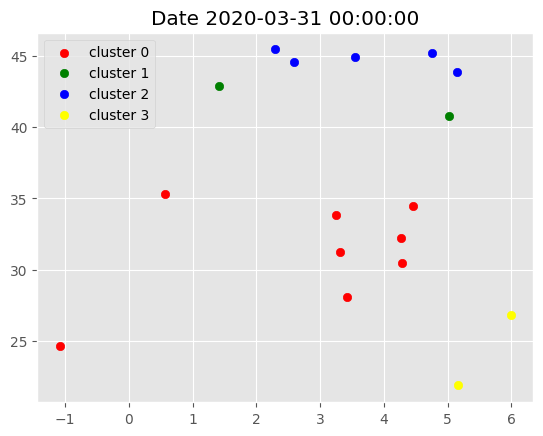

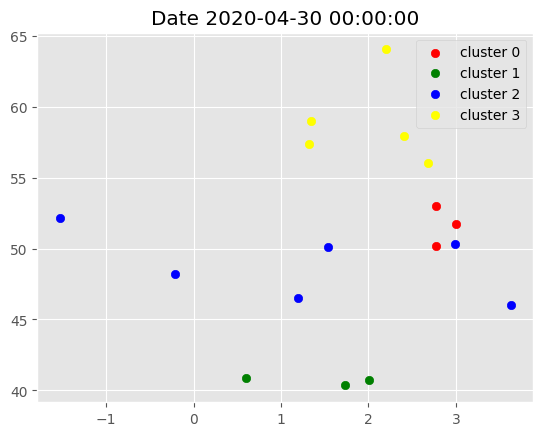

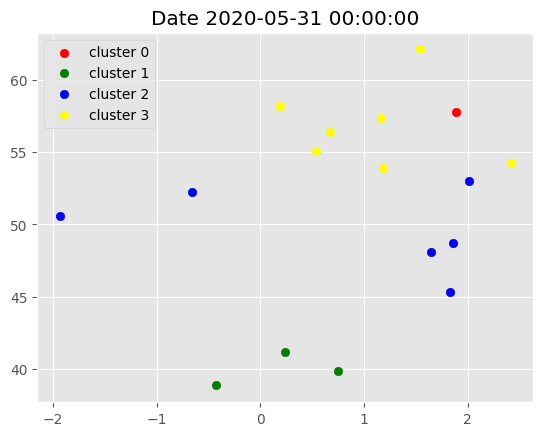

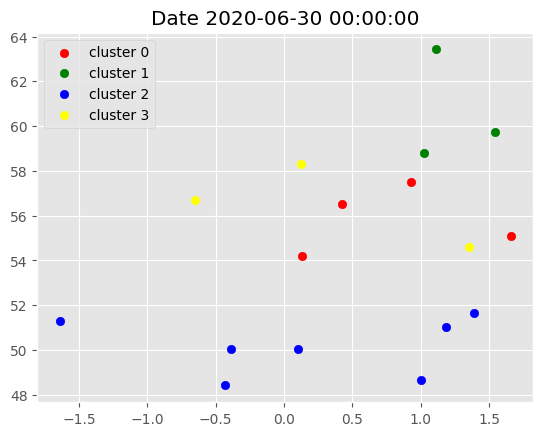

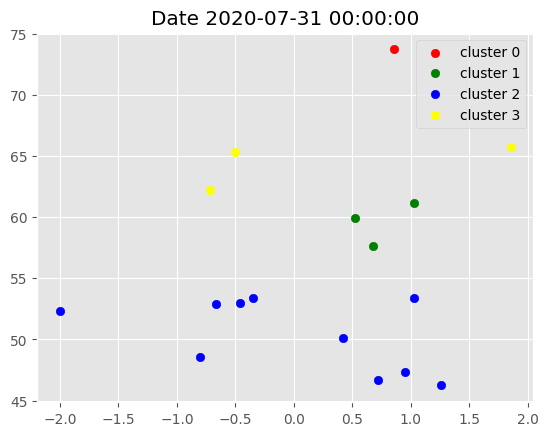

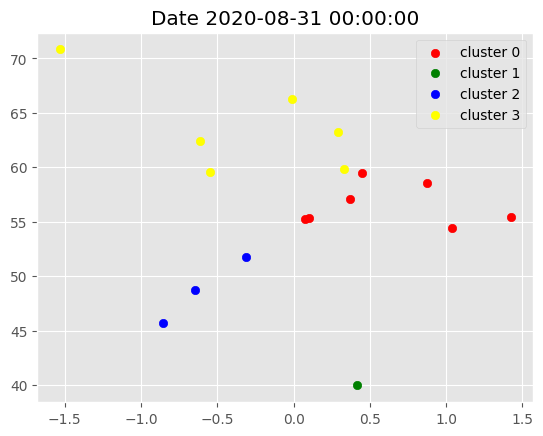

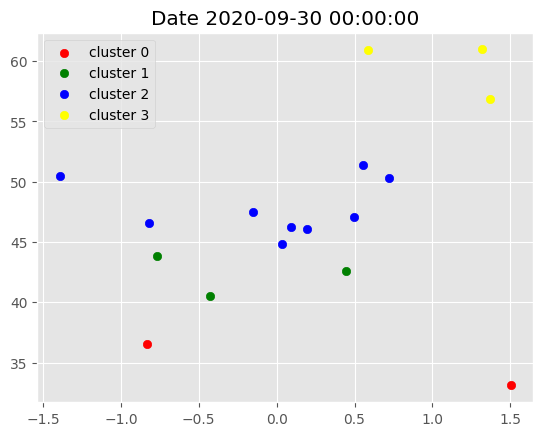

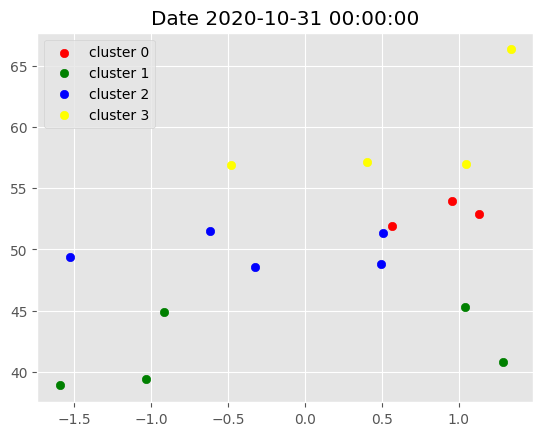

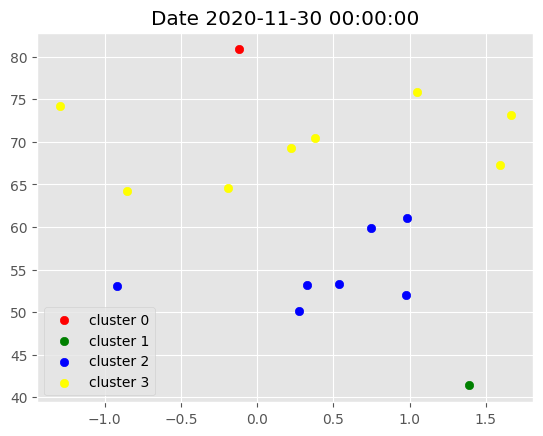

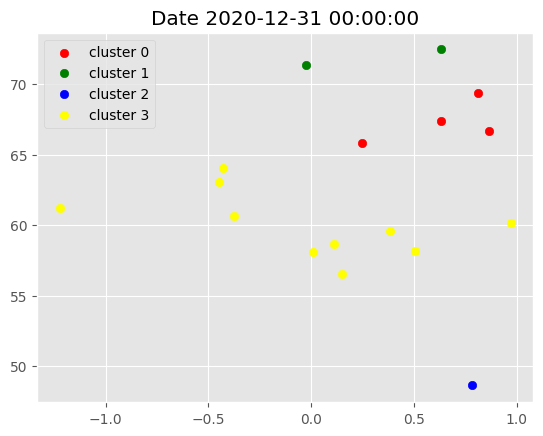

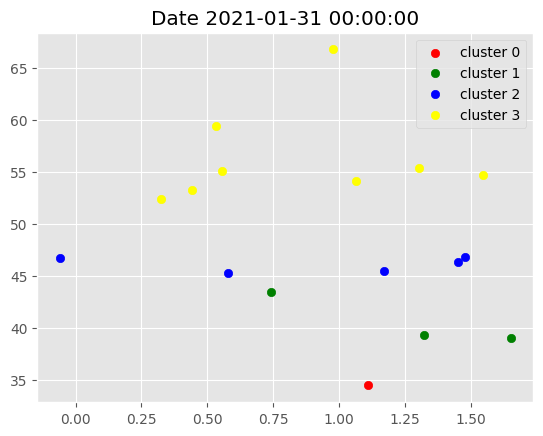

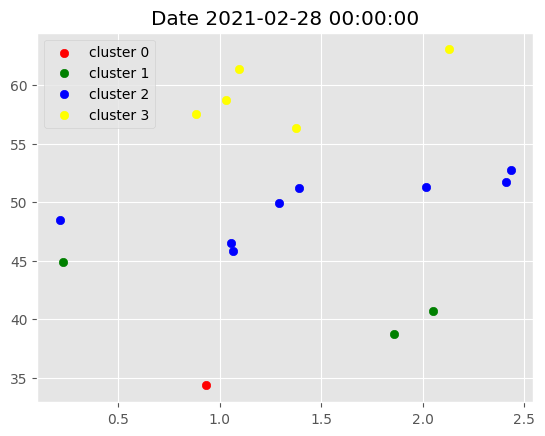

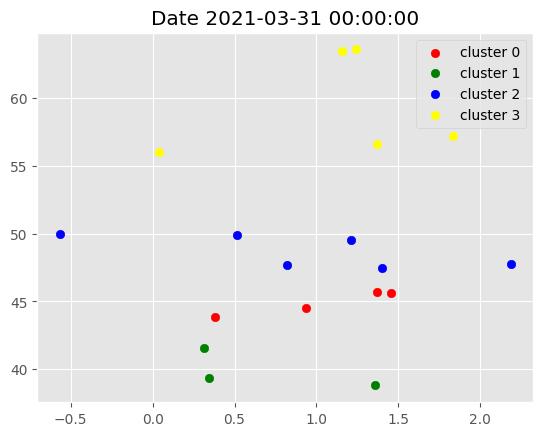

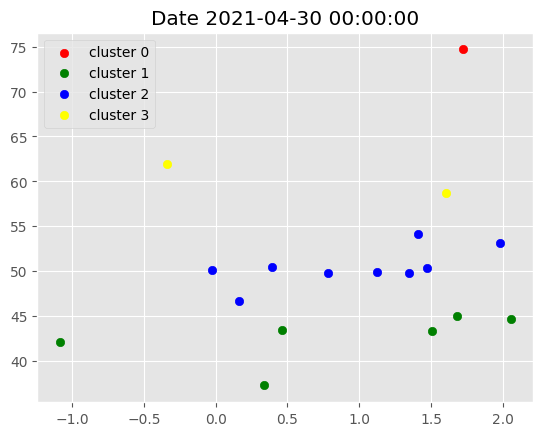

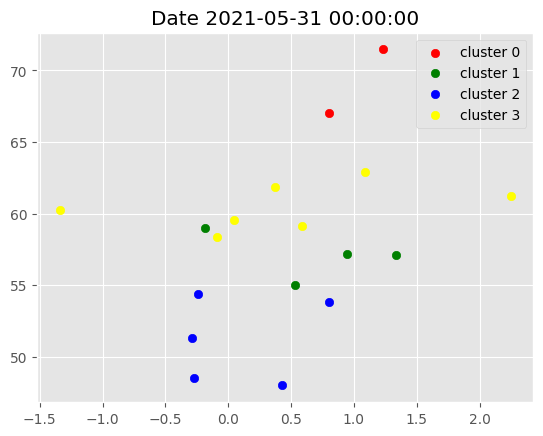

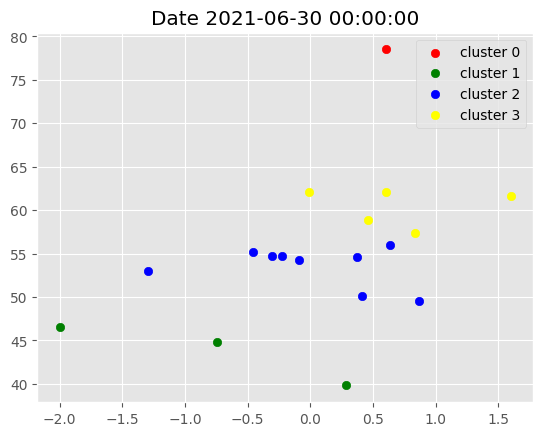

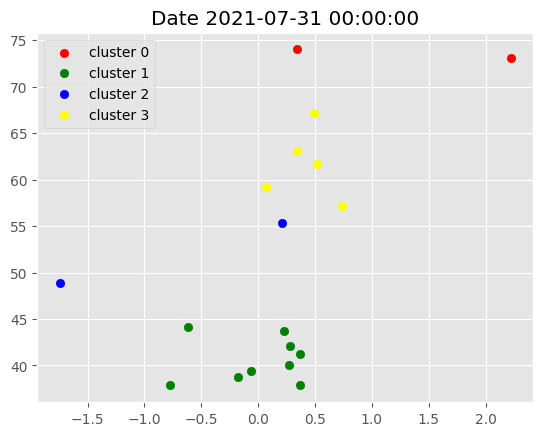

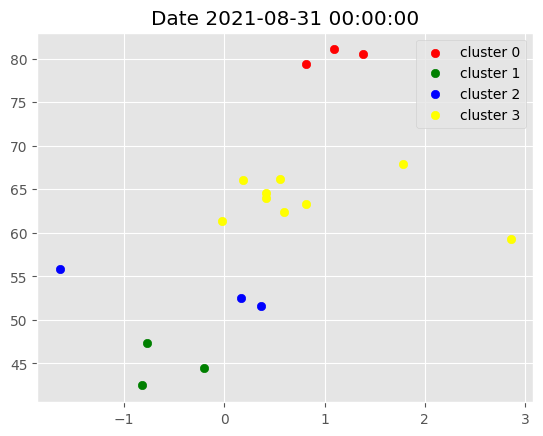

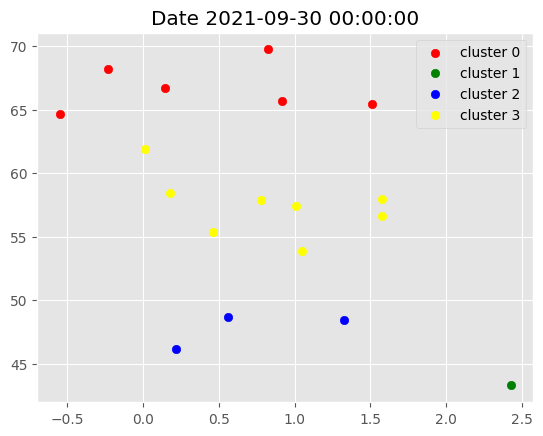

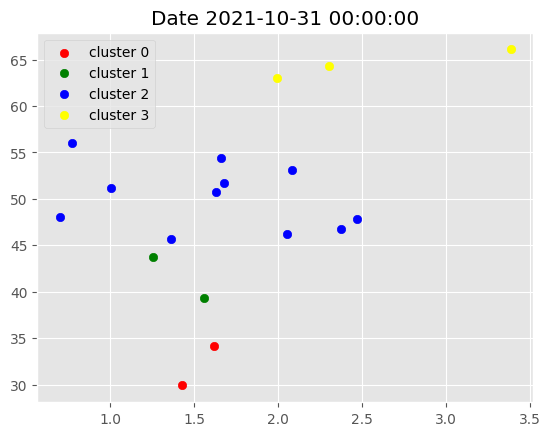

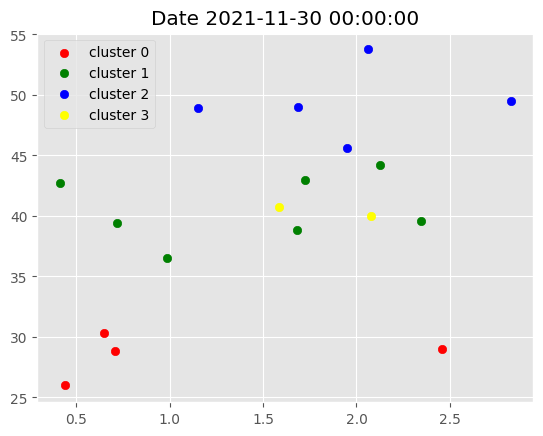

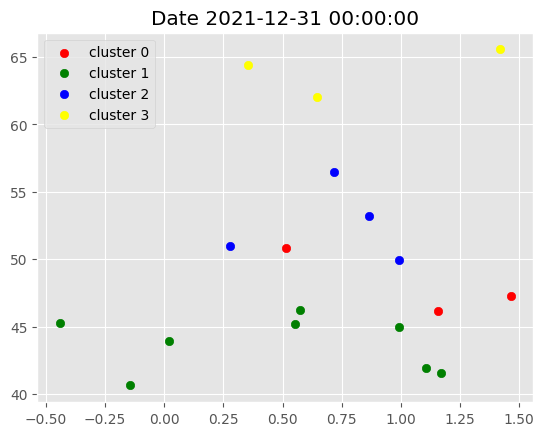

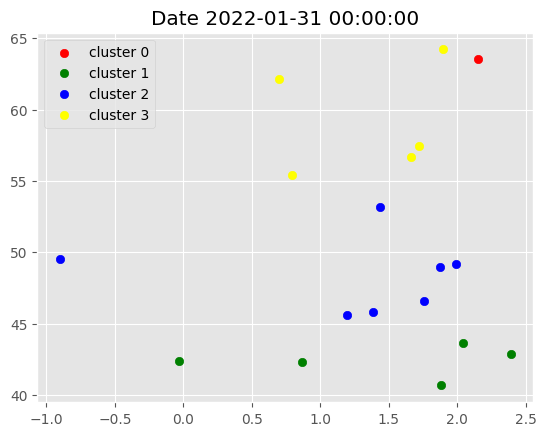

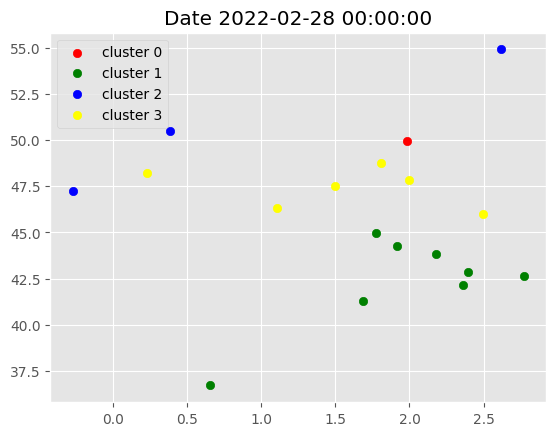

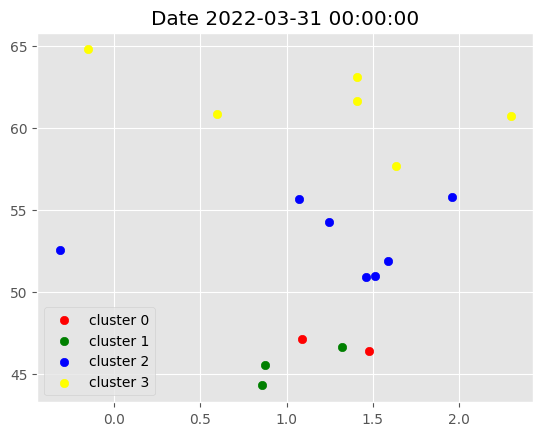

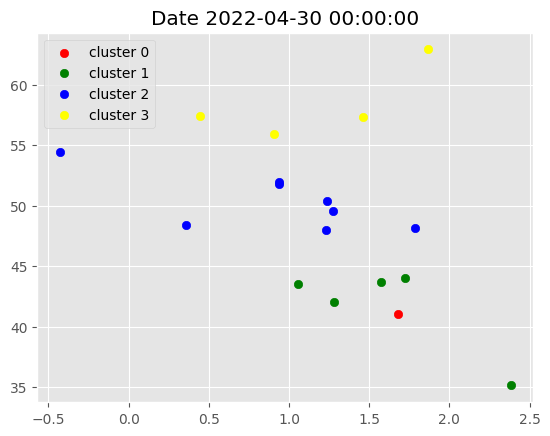

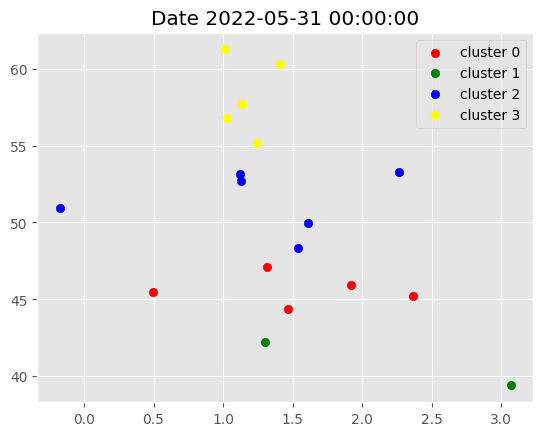

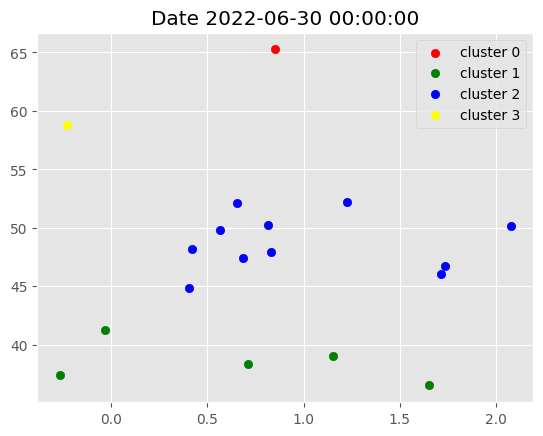

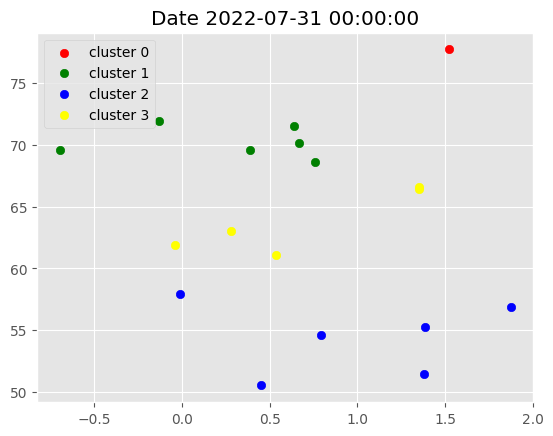

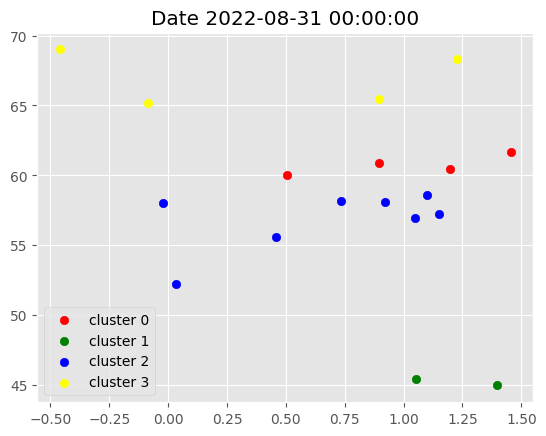

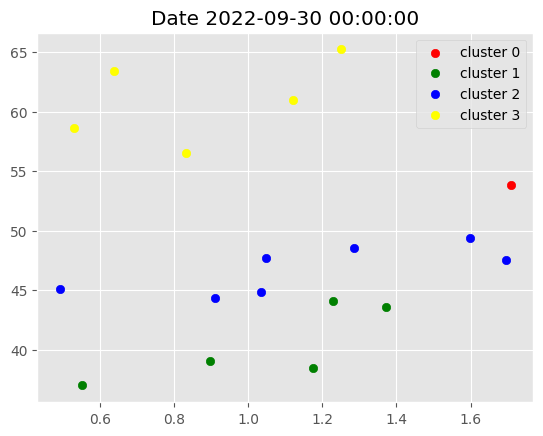

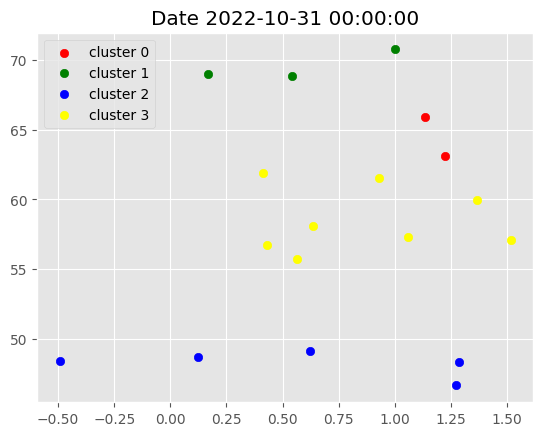

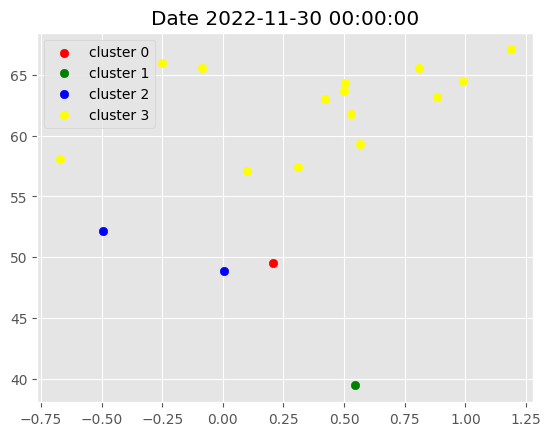

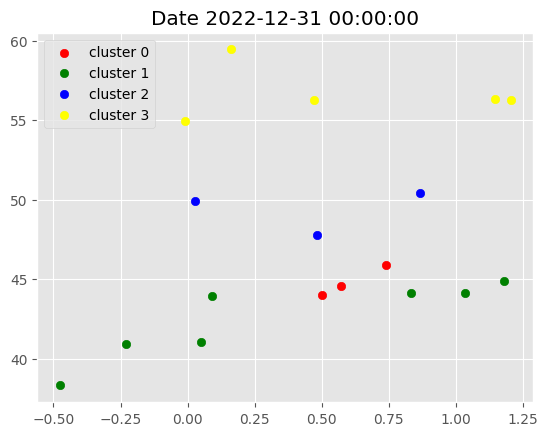

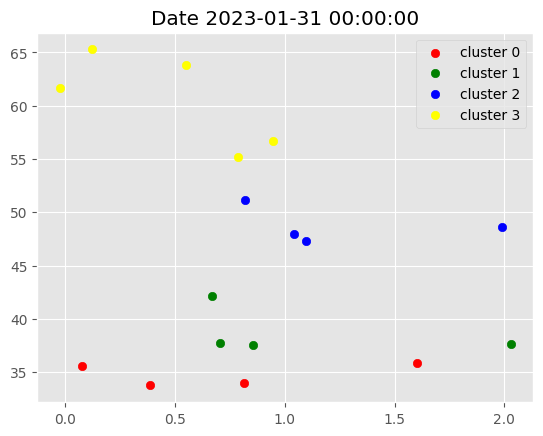

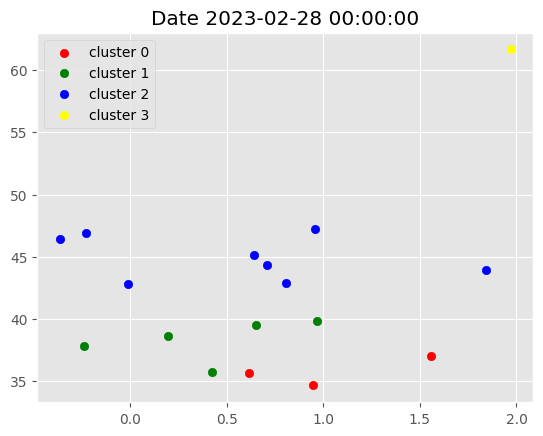

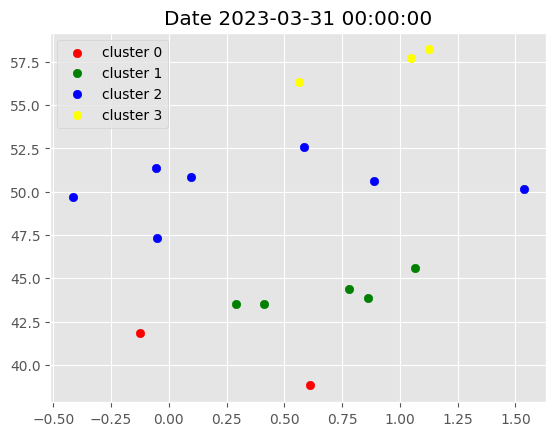

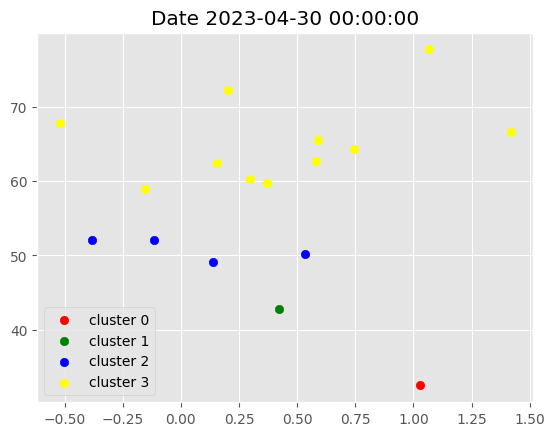

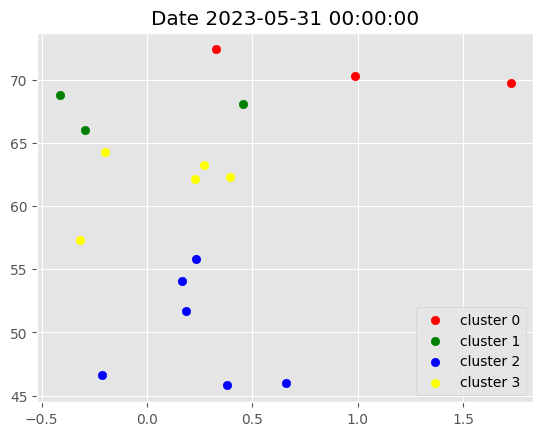

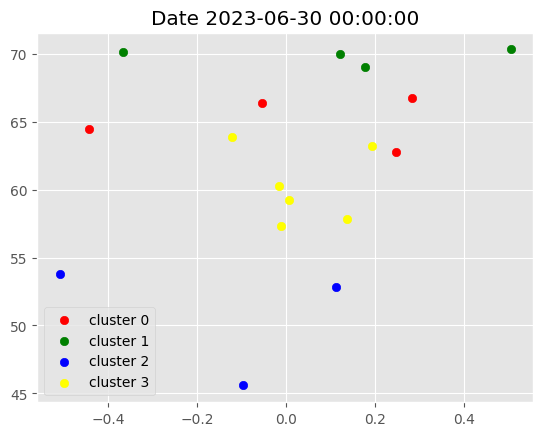

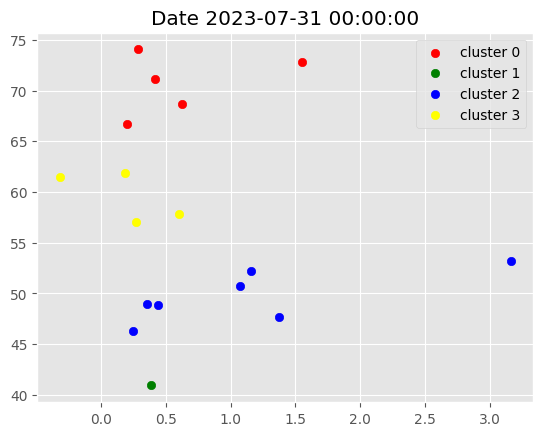

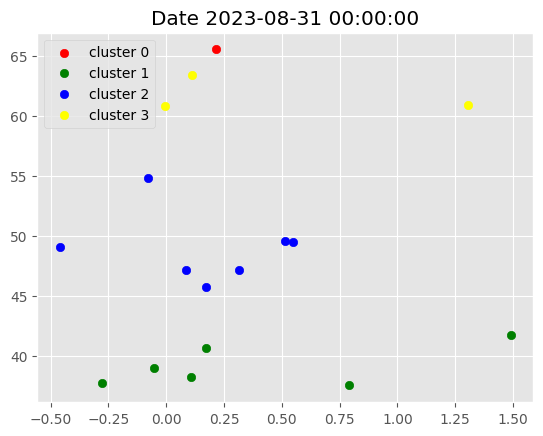

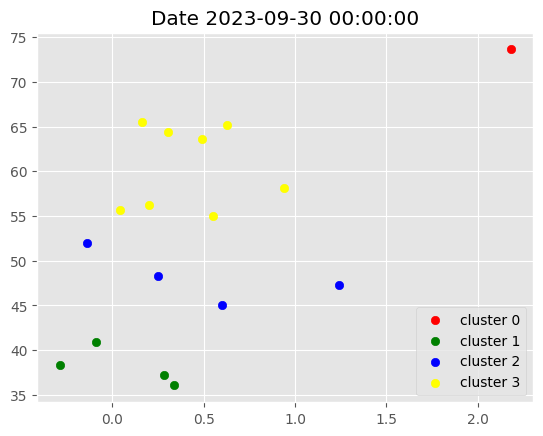

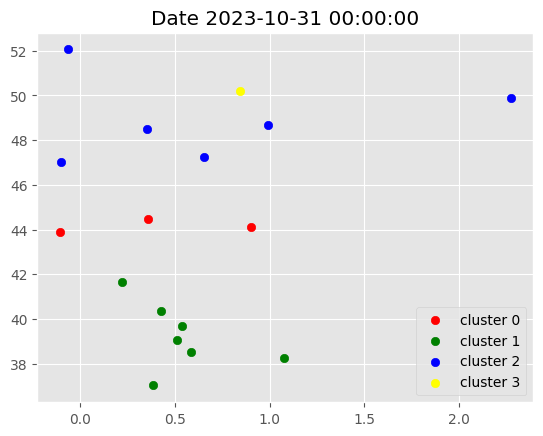

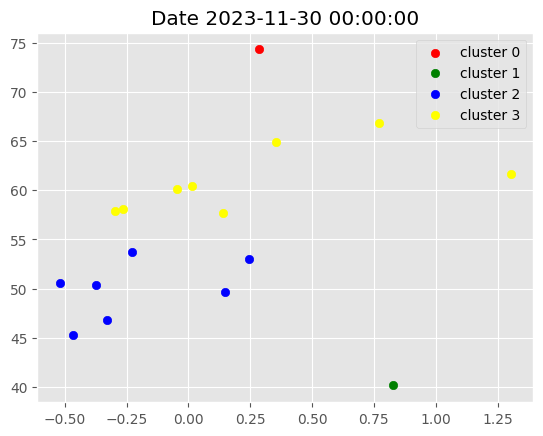

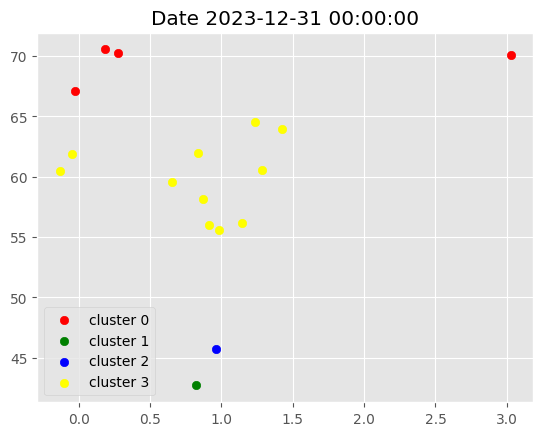

In [84]:
plt.style.use('ggplot')

for i in data.index.get_level_values('date').unique().tolist():
    
    g = data.xs(i, level=0)
    
    plt.title(f'Date {i}')
    
    plot_clusters(g)

In [85]:
filtered_df = data[data['cluster']==3].copy()
filtered_df

atr   bb_high    bb_low    bb_mid  \
date       ticker                                                  
2020-01-31 BHARTIARTL.NS  0.298491  6.276199  6.071828  6.174014   
           INFY.NS       -0.605192  6.589390  6.479497  6.534444   
           KOTAKBANK.NS   0.468029  7.448364  7.368901  7.408632   
           LT.NS         -0.842303  7.160099  7.089209  7.124654   
2020-02-29 MARUTI.NS      0.396595  8.878358  8.706142  8.792250   
...                            ...       ...       ...       ...   
2023-12-31 ITC.NS         1.143438  6.148477  6.082084  6.115280   
           SBIN.NS        1.233841  6.513592  6.328189  6.420890   
           TATAMOTORS.NS  0.655290  6.601320  6.548933  6.575126   
           TATASTEEL.NS   0.838812  4.926641  4.844325  4.885483   
           TCS.NS         1.422750  8.275464  8.133498  8.204481   

                          garman_klass_vol      macd        rsi  return_1m  \
date       ticker                                                            
2020-01-31 BHARTIARTL.NS          0.002622  1.280898  60.166851   0.089184   
           INFY.NS                0.042892  0.541699  58.818380   0.061273   
           KOTAKBANK.NS           0.005169 -0.478699  55.337145   0.004393   
           LT.NS                  0.028216  0.113437  57.699517   0.054768   
2020-02-29 MARUTI.NS              0.005513 -2.010832  29.746981  -0.091184   
...                                    ...       ...        ...        ...   
2023-12-31 ITC.NS                -0.000296  0.741769  56.180774   0.047384   
           SBIN.NS                0.000523  2.145239  64.538178   0.129792   
           TATAMOTORS.NS          0.004305  1.091741  59.590401   0.018615   
           TATASTEEL.NS          -0.001357  1.160248  61.984352   0.057076   
           TCS.NS                 0.002531  2.629082  63.946667   0.088299   

                          return_2m  return_3m  return_6m  return_9m  \
date       ticker                                                      
2020-01-31 BHARTIARTL.NS   0.059268   0.097441   0.066380   0.049897   
           INFY.NS         0.055609   0.042128  -0.001673   0.006549   
           KOTAKBANK.NS    0.023422   0.024231   0.018053   0.022412   
           LT.NS           0.014457  -0.024051  -0.002174   0.003130   
2020-02-29 MARUTI.NS      -0.076590  -0.046410   0.004291  -0.008346   
...                             ...        ...        ...        ...   
2023-12-31 ITC.NS          0.032219   0.008958   0.001782   0.020233   
           SBIN.NS         0.062165   0.021531   0.018128   0.024364   
           TATAMOTORS.NS   0.069858   0.045187   0.032561   0.061787   
           TATASTEEL.NS    0.067017   0.016033   0.031873   0.032711   
           TCS.NS          0.061458   0.025490   0.024360   0.020363   

                          return_12m    Mkt-RF       SMB       HML       RMW  \
date       ticker                                                              
2020-01-31 BHARTIARTL.NS    0.048468  0.207123 -0.690571  0.138959 -0.711570   
           INFY.NS          0.005109  0.804030  0.129299 -0.438332 -0.051159   
           KOTAKBANK.NS     0.025193  0.377124 -0.258827  1.091047 -0.685919   
           LT.NS            0.004497  0.725943  0.504322  0.286923  0.146448   
2020-02-29 MARUTI.NS       -0.005780  0.164135 -0.072981  0.716920 -0.309463   
...                              ...       ...       ...       ...       ...   
2023-12-31 ITC.NS           0.028866  0.338394  0.206010  0.176774 -0.486633   
           SBIN.NS          0.004858  0.693076 -0.457648  1.455869 -0.726635   
           TATAMOTORS.NS    0.053100  1.516963  0.020620  1.011660 -1.094195   
           TATASTEEL.NS     0.018043  1.467975 -0.262872  0.423980 -0.515633   
           TCS.NS           0.015600  0.301958  0.445443 -0.335830  0.114671   

                               CMA  cluster  
date       ticker                            
2020-01-31 BHARTIARTL.NS -0.101186        3  
           INFY

In [86]:
filtered_df = filtered_df.reset_index(level=1)
filtered_df


,ticker,atr,bb_high,bb_low,bb_mid,garman_klass_vol,macd,rsi,return_1m,return_2m,return_3m,return_6m,return_9m,return_12m,Mkt-RF,SMB,HML,RMW,CMA,cluster
date,,,,,,,,,,,,,,,,,,,,
2020-01-31,BHARTIARTL.NS,0.298491,6.276199,6.071828,6.174014,0.002622,1.280898,60.166851,0.089184,0.059268,0.097441,0.066380,0.049897,0.048468,0.207123,-0.690571,0.138959,-0.711570,-0.101186,3
2020-01-31,INFY.NS,-0.605192,6.589390,6.479497,6.534444,0.042892,0.541699,58.818380,0.061273,0.055609,0.042128,-0.001673,0.006549,0.005109,0.804030,0.129299,-0.438332,-0.051159,0.440578,3
2020-01-31,KOTAKBANK.NS,0.468029,7.448364,7.368901,7.408632,0.005169,-0.478699,55.337145,0.004393,0.023422,0.024231,0.018053,0.022412,0.025193,0.377124,-0.258827,1.091047,-0.685919,-0.975304,3
2020-01-31,LT.NS,-0.842303,7.160099,7.089209,7.124654,0.028216,0.113437,57.699517,0.054768,0.014457,-0.024051,-0.002174,0.003130,0.004497,0.725943,0.504322,0.286923,0.146448,-0.135134,3
2020-02-29,MARUTI.NS,0.396595,8.878358,8.706142,8.792250,0.005513,-2.010832,29.746981,-0.091184,-0.076590,-0.046410,0.004291,-0.008346,-0.005780,0.164135,-0.072981,0.716920,-0.309463,-0.398791,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31,ITC.NS,1.143438,6.148477,6.082084,6.115280,-0.000296,0.741769,56.180774,0.047384,0.032219,0.008958,0.001782,0.020233,0.028866,0.338394,0.206010,0.176774,-0.486633,0.310013,3
2023-12-31,SBIN.NS,1.233841,6.513592,6.328189,6.420890,0.000523,2.145239,64.538178,0.129792,0.062165,0.021531,0.018128,0.024364,0.004858,0.693076,-0.457648,1.455869,-0.726635,-0.956071,3
2023-12-31,TATAMOTORS.NS,0.655290,6.601320,6.548933,6.575126,0.004305,1.091741,59.590401,0.018615,0.069858,0.045187,0.032561,0.061787,0.053100,1.516963,0.020620,1.011660,-1.094195,-0.226712,3


In [87]:
filtered_df.index = filtered_df.index+pd.DateOffset(1)
filtered_df

,ticker,atr,bb_high,bb_low,bb_mid,garman_klass_vol,macd,rsi,return_1m,return_2m,return_3m,return_6m,return_9m,return_12m,Mkt-RF,SMB,HML,RMW,CMA,cluster
date,,,,,,,,,,,,,,,,,,,,
2020-02-01,BHARTIARTL.NS,0.298491,6.276199,6.071828,6.174014,0.002622,1.280898,60.166851,0.089184,0.059268,0.097441,0.066380,0.049897,0.048468,0.207123,-0.690571,0.138959,-0.711570,-0.101186,3
2020-02-01,INFY.NS,-0.605192,6.589390,6.479497,6.534444,0.042892,0.541699,58.818380,0.061273,0.055609,0.042128,-0.001673,0.006549,0.005109,0.804030,0.129299,-0.438332,-0.051159,0.440578,3
2020-02-01,KOTAKBANK.NS,0.468029,7.448364,7.368901,7.408632,0.005169,-0.478699,55.337145,0.004393,0.023422,0.024231,0.018053,0.022412,0.025193,0.377124,-0.258827,1.091047,-0.685919,-0.975304,3
2020-02-01,LT.NS,-0.842303,7.160099,7.089209,7.124654,0.028216,0.113437,57.699517,0.054768,0.014457,-0.024051,-0.002174,0.003130,0.004497,0.725943,0.504322,0.286923,0.146448,-0.135134,3
2020-03-01,MARUTI.NS,0.396595,8.878358,8.706142,8.792250,0.005513,-2.010832,29.746981,-0.091184,-0.076590,-0.046410,0.004291,-0.008346,-0.005780,0.164135,-0.072981,0.716920,-0.309463,-0.398791,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-01,ITC.NS,1.143438,6.148477,6.082084,6.115280,-0.000296,0.741769,56.180774,0.047384,0.032219,0.008958,0.001782,0.020233,0.028866,0.338394,0.206010,0.176774,-0.486633,0.310013,3
2024-01-01,SBIN.NS,1.233841,6.513592,6.328189,6.420890,0.000523,2.145239,64.538178,0.129792,0.062165,0.021531,0.018128,0.024364,0.004858,0.693076,-0.457648,1.455869,-0.726635,-0.956071,3
2024-01-01,TATAMOTORS.NS,0.655290,6.601320,6.548933,6.575126,0.004305,1.091741,59.590401,0.018615,0.069858,0.045187,0.032561,0.061787,0.053100,1.516963,0.020620,1.011660,-1.094195,-0.226712,3


In [88]:
filtered_df = filtered_df.reset_index().set_index(['date', 'ticker'])

In [89]:
dates = filtered_df.index.get_level_values('date').unique().tolist()
dates


[Timestamp('2020-02-01 00:00:00'),
 Timestamp('2020-03-01 00:00:00'),
 Timestamp('2020-04-01 00:00:00'),
 Timestamp('2020-05-01 00:00:00'),
 Timestamp('2020-06-01 00:00:00'),
 Timestamp('2020-07-01 00:00:00'),
 Timestamp('2020-08-01 00:00:00'),
 Timestamp('2020-09-01 00:00:00'),
 Timestamp('2020-10-01 00:00:00'),
 Timestamp('2020-11-01 00:00:00'),
 Timestamp('2020-12-01 00:00:00'),
 Timestamp('2021-01-01 00:00:00'),
 Timestamp('2021-02-01 00:00:00'),
 Timestamp('2021-03-01 00:00:00'),
 Timestamp('2021-04-01 00:00:00'),
 Timestamp('2021-05-01 00:00:00'),
 Timestamp('2021-06-01 00:00:00'),
 Timestamp('2021-07-01 00:00:00'),
 Timestamp('2021-08-01 00:00:00'),
 Timestamp('2021-09-01 00:00:00'),
 Timestamp('2021-10-01 00:00:00'),
 Timestamp('2021-11-01 00:00:00'),
 Timestamp('2021-12-01 00:00:00'),
 Timestamp('2022-01-01 00:00:00'),
 Timestamp('2022-02-01 00:00:00'),
 Timestamp('2022-03-01 00:00:00'),
 Timestamp('2022-04-01 00:00:00'),
 Timestamp('2022-05-01 00:00:00'),
 Timestamp('2022-06-

In [90]:
fixed_dates = {}
for d in dates:
    fixed_dates[d.strftime('%Y-%m-%d')] = filtered_df.xs(d, level= 0).index.tolist()
fixed_dates

{'2020-02-01': ['BHARTIARTL.NS', 'INFY.NS', 'KOTAKBANK.NS', 'LT.NS'],
 '2020-03-01': ['MARUTI.NS'],
 '2020-04-01': ['AXISBANK.NS', 'INDUSINDBK.NS'],
 '2020-05-01': ['BHARTIARTL.NS',
  'INFY.NS',
  'RELIANCE.NS',
  'SUNPHARMA.NS',
  'TCS.NS'],
 '2020-06-01': ['BHARTIARTL.NS',
  'INFY.NS',
  'ITC.NS',
  'LT.NS',
  'RELIANCE.NS',
  'SUNPHARMA.NS',
  'TCS.NS'],
 '2020-07-01': ['INFY.NS', 'ITC.NS', 'TATASTEEL.NS'],
 '2020-08-01': ['RELIANCE.NS', 'SUNPHARMA.NS', 'TATASTEEL.NS'],
 '2020-09-01': ['AXISBANK.NS',
  'ICICIBANK.NS',
  'INDUSINDBK.NS',
  'SBIN.NS',
  'TATAMOTORS.NS',
  'TATASTEEL.NS'],
 '2020-10-01': ['INFY.NS', 'RELIANCE.NS', 'TCS.NS'],
 '2020-11-01': ['AXISBANK.NS', 'KOTAKBANK.NS', 'TATASTEEL.NS', 'TCS.NS'],
 '2020-12-01': ['BAJFINANCE.NS',
  'HDFCBANK.NS',
  'INDUSINDBK.NS',
  'ITC.NS',
  'KOTAKBANK.NS',
  'LT.NS',
  'SBIN.NS',
  'TATAMOTORS.NS'],
 '2021-01-01': ['AXISBANK.NS',
  'BHARTIARTL.NS',
  'HDFCBANK.NS',
  'INDUSINDBK.NS',
  'ITC.NS',
  'MARUTI.NS',
  'SBIN.NS',
  'SUNP

In [91]:
pip install --upgrade pypfopt


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pypfopt (from versions: none)
ERROR: No matching distribution found for pypfopt

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [92]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [93]:
def optimize_weights(prices, lower_bound= 0):
    
    returns = expected_returns.mean_historical_return(prices = prices, frequency =252)
    
    cov = risk_models.sample_cov(prices=prices,frequency =252)
    
    ef = EfficientFrontier (returns, cov, weight_bounds = (lower_bound,1), solver='SCS')
    
    weights = ef.max_sharpe()
    return ef.clean_weights

In [94]:
stocks = data.index.get_level_values('ticker').unique().tolist()

new_df = yf.download(tickers=stocks, start = data.index.get_level_values('date').unique()[0]-pd.DateOffset(months=12),end=data.index.get_level_values('date').unique()[-1])

new_df

[*********************100%%**********************]  18 of 18 completed


Adj Close                                           \
            AXISBANK.NS BAJFINANCE.NS BHARTIARTL.NS  HDFCBANK.NS   
Date                                                               
2019-01-31   719.971802   2529.265625    277.825043  1003.502319   
2019-02-01   714.542419   2581.867432    282.766754  1008.568115   
2019-02-04   717.780151   2548.518311    277.961060  1015.539795   
2019-02-05   726.746216   2557.506348    279.457184  1019.954407   
2019-02-06   723.010315   2663.250488    279.955872  1024.103516   
...                 ...           ...           ...          ...   
2023-12-20  1110.250000   7493.950195    971.549988  1657.000000   
2023-12-21  1095.400024   7367.149902    977.900024  1686.699951   
2023-12-22  1088.300049   7295.299805    989.549988  1670.849976   
2023-12-26  1094.250000   7162.299805    999.849976  1682.449951   
2023-12-27  1094.750000   7229.850098   1021.099976  1695.500000   

                                                                              \
           HINDUNILVR.NS ICICIBANK.NS INDUSINDBK.NS      INFY.NS      ITC.NS   
Date                                                                           
2019-01-31   1622.723999   357.396118   1462.326904   657.335876  230.941162   
2019-02-01   1655.901123   347.785797   1471.651367   663.913086  232.764511   
2019-02-04   1658.937866   347.687744   1461.452881   662.904541  229.656555   
2019-02-05   1676.285645   345.824493   1497.487671   661.983765  227.211609   
2019-02-06   1684.108154   352.345795   1482.238525   669.394104  230.153854   
...                  ...          ...           ...          ...         ...   
2023-12-20   2557.500000  1006.650024   1556.150024  1536.400024  451.000000   
2023-12-21   2553.199951  1004.400024   1570.000000  1536.000000  451.450012   
2023-12-22   2575.600098   994.299988   1562.349976  1562.900024  455.200012   
2023-12-26   2584.750000   995.099976   1570.800049  1543.949951  456.450012   
2023-12-27   2598.949951   998.950012   1595.599976  1560.300049  454.899994   

                         ...    Volume                                  \
           KOTAKBANK.NS  ...    ITC.NS KOTAKBANK.NS    LT.NS MARUTI.NS   
Date                     ...                                             
2019-01-31  1252.664307  ...  15346406      2968660  5852257    926270   
2019-02-01  1252.614380  ...  18353829      2189154  2515736   2545419   
2019-02-04  1269.073853  ...   6056619      1379319  2308931    658776   
2019-02-05  1276.006714  ...   9827060      1917782  1447400    681498   
2019-02-06  1276.356079  ...   8097580      1158741  2034886    567827   
...                 ...  ...       ...          ...      ...       ...   
2023-12-20  1826.500000  ...  10367665      3968562  1876048    964051   
2023-12-21  1852.699951  ...  11154625      2403840  2292802    739806   
2023-12-22  1860.500000  ...  11026317      3309295  1681707    652545   
2023-12-26  1886.849976  ...   5871301      4350669  1072263    395273   
2023-12-27  1896.599976  ...   3257882      2228765   783074    206901   

                                                                          \
           RELIANCE.NS   SBIN.NS SUNPHARMA.NS TATAMOTORS.NS TATASTEEL.NS   
Date                                                                       
2019-01-31    10281893  25546487     16672076      22277646     92437290   
2019-02-01     9316446  60015958      3950126      14931422     50159940   
2019-02-04    11781195  20642919      3679517      11854351    109720290   
2019-02-05     9451152  13291133      3523707      12064426     72819270   
2019-02-06     9500797  12149759      5638849      10334594    109992650   
...                ...       ...          ...           ...          ...   
2023-12-20     8868361  22542056      1837031       8107602     39495961   
2023-12-21     6882727  19915516      1916222       7702232     34914399   
2023-12-22     8270892  14998068      2058127      12062238     373

In [96]:
optimization_df = new_df[optimization_start_date:optimization_end_date]['Adj Close'][cols]
optimization_df

,BHARTIARTL.NS,INFY.NS,KOTAKBANK.NS,LT.NS
Date,,,,
2019-02-01,282.766754,663.913086,1252.614380,1221.707397
2019-02-04,277.961060,662.904541,1269.073853,1205.843506
2019-02-05,279.457184,661.983765,1276.006714,1203.260864
2019-02-06,279.955872,669.394104,1276.356079,1212.299683
2019-02-07,282.132019,670.008179,1281.393555,1195.375000
...,...,...,...,...
2020-01-27,507.991608,700.723389,1615.243652,1259.932983
2020-01-28,485.130005,700.633423,1622.928955,1258.111450
2020-01-29,484.142456,711.169922,1637.301147,1275.908691


In [103]:
returns_dataframe = np.log(new_df['Adj Close']).diff()

portfolio_df = pd.DataFrame()

for start_date in fixed_dates.keys():
    end_date =(pd.to_datetime(start_date)+pd.offsets.MonthEnd(0)).strftime('%Y-%m-%d')
    cols = fixed_dates[start_date]
    optimization_start_date = (pd.to_datetime(start_date)-pd.DateOffset(months=12)).strftime('%Y-%m-%d')
    optimization_end_date = (pd.to_datetime(start_date)-pd.DateOffset(days=1)).strftime('%Y-%m-%d')
    success = False
    try:
        weights = optimize_weights(prices=optimization_df,
        lower_bound=round(1/(len(optimization_df.columns)*2),2))

        weights = pd.DataFrame(weights, index=pd.Series(0))
            
        success = True
    except:
        print(f'Max Sharpe Optimization failed for {start_date}, Continuing with Equal-Weights')
        
    if success==False:
        weights = pd.DataFrame([1/len(optimization_df.columns) for i in range(len(optimization_df.columns))],
        index=optimization_df.columns.tolist(),
        columns=pd.Series(0)).T
        

Max Sharpe Optimization failed for 2020-02-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2020-03-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2020-04-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2020-05-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2020-06-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2020-07-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2020-08-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2020-09-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2020-10-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2020-11-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2020-12-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2021-01-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2021-02-01, Continuing with Equal-Weights

In [111]:
date = datetime.now()
end_date=date.date()
start_date = (pd.to_datetime(end) - pd.DateOffset(365 * 10)).date()

In [112]:
temp_df = returns_dataframe[start_date:end_date]


In [113]:
temp_df

,AXISBANK.NS,BAJFINANCE.NS,BHARTIARTL.NS,HDFCBANK.NS,HINDUNILVR.NS,ICICIBANK.NS,INDUSINDBK.NS,INFY.NS,ITC.NS,KOTAKBANK.NS,LT.NS,MARUTI.NS,RELIANCE.NS,SBIN.NS,SUNPHARMA.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS
Date,,,,,,,,,,,,,,,,,,
2019-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-01,-0.007570,0.020584,0.017631,0.005035,0.020239,-0.027258,0.006356,0.009956,0.007864,-0.000040,0.007806,0.047225,0.018409,-0.032007,-0.000472,0.002480,-0.004204,0.007839
2019-02-04,0.004521,-0.013001,-0.017141,0.006889,0.001832,-0.000282,-0.006954,-0.001520,-0.013442,0.013055,-0.013070,0.003713,0.032236,-0.001583,-0.020167,-0.007737,0.002840,0.009951
2019-02-05,0.012414,0.003521,0.005368,0.004338,0.010403,-0.005373,0.024358,-0.001390,-0.010703,0.005448,-0.002144,0.014970,0.000504,0.002462,-0.011883,-0.024998,-0.024131,-0.002784
2019-02-06,-0.005154,0.040515,0.001783,0.004060,0.004656,0.018682,-0.010235,0.011132,0.012866,0.000274,0.007484,0.012580,0.014375,0.015339,0.016213,0.015242,0.042963,0.014687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-20,-0.008967,-0.018339,-0.017245,0.002477,-0.001250,-0.008704,-0.006661,-0.014153,-0.011245,-0.010917,-0.023261,-0.014999,-0.012173,-0.029340,-0.010335,-0.033053,-0.042624,-0.009518
2023-12-21,-0.013466,-0.017065,0.006515,0.017765,-0.001683,-0.002238,0.008861,-0.000260,0.000997,0.014242,0.001651,-0.006808,0.013911,0.011405,0.001095,0.005092,0.009588,0.001969
2023-12-22,-0.006503,-0.009801,0.011843,-0.009441,0.008735,-0.010107,-0.004885,0.017361,0.008272,0.004201,0.015590,0.020198,0.000975,-0.010933,0.008195,0.022114,0.019279,0.009591


In [114]:

temp_df = temp_df.stack().to_frame('return').reset_index(level=0)\
            .merge(weights.stack().to_frame('weight').reset_index(level=0, drop=True),
                    left_index=True,
                    right_index=True)\
                    .reset_index().set_index(['Date', 'index']).unstack().stack()


In [115]:
temp_df

return  weight
Date       index                          
2019-02-01 BHARTIARTL.NS  0.017631    0.25
           INFY.NS        0.009956    0.25
           KOTAKBANK.NS  -0.000040    0.25
           LT.NS          0.007806    0.25
2019-02-04 BHARTIARTL.NS -0.017141    0.25
...                            ...     ...
2023-12-26 LT.NS          0.003473    0.25
2023-12-27 BHARTIARTL.NS  0.021030    0.25
           INFY.NS        0.010534    0.25
           KOTAKBANK.NS   0.005154    0.25
           LT.NS          0.009681    0.25

[4840 rows x 2 columns]

In [116]:

temp_df.index.names = ['date', 'ticker']

temp_df['weighted_return'] = temp_df['return']*temp_df['weight']


In [117]:
temp_df = temp_df.groupby(level=0)['weighted_return'].sum().to_frame('Strategy Return')

portfolio_df = pd.concat([portfolio_df, temp_df], axis=0)

In [118]:
portfolio_df = portfolio_df.drop_duplicates()

portfolio_df

,Strategy Return
date,
2019-02-01,0.008838
2019-02-04,-0.004669
2019-02-05,0.001821
2019-02-06,0.005168
2019-02-07,-0.000365
...,...
2023-12-20,-0.016394
2023-12-21,0.005537
2023-12-22,0.012249


In [122]:
date = datetime.now()
end=date.date()
start = (pd.to_datetime(end) - pd.DateOffset(365 * 10)).date()
ticker = 'UTINIFTETF.NS'
n50 = yf.download(ticker,start,end)

[*********************100%%**********************]  1 of 1 completed


In [124]:
n50_ret = np.log(n50[['Adj Close']]).diff().dropna().rename({'Adj Close':'N50 Buy&Hold'}, axis=1)

portfolio_df = portfolio_df.merge(n50_ret,
                                left_index=True,
                                right_index=True)

portfolio_df

,Strategy Return,N50 Buy&Hold
2019-02-01,0.008838,0.019715
2019-02-04,-0.004669,0.003073
2019-02-05,0.001821,-0.005186
2019-02-06,0.005168,0.011260
2019-02-07,-0.000365,0.014103
...,...,...
2023-12-19,-0.000952,0.000953
2023-12-20,-0.016394,-0.013605
2023-12-21,0.005537,0.003725
2023-12-22,0.012249,0.002359


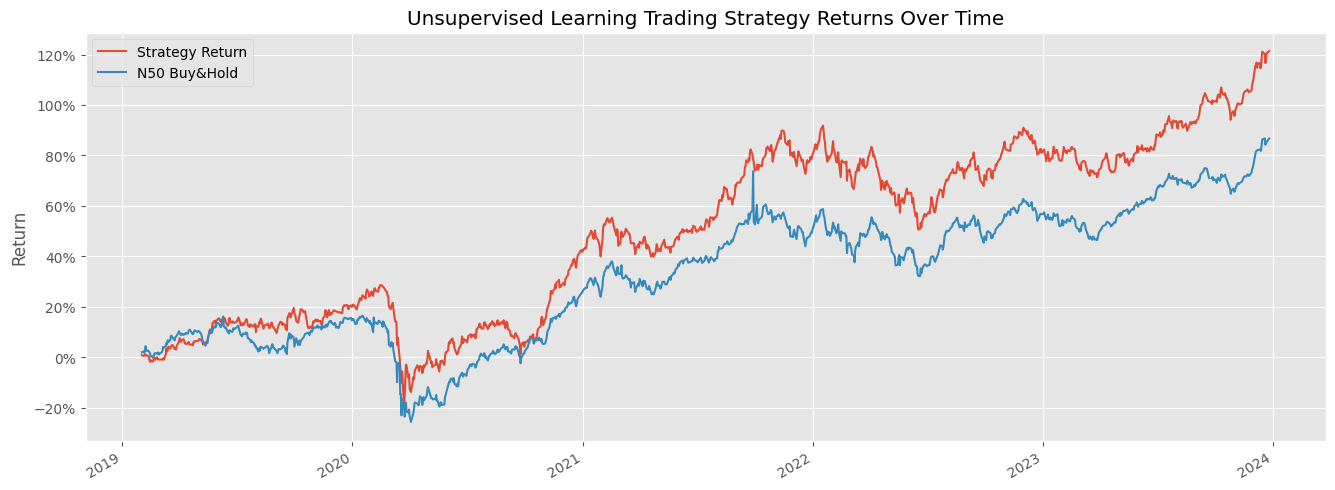

In [125]:
import matplotlib.ticker as mtick

plt.style.use('ggplot')

portfolio_cumulative_return = np.exp(np.log1p(portfolio_df).cumsum())-1

portfolio_cumulative_return[:'2023-12-26'].plot(figsize=(16,6))

plt.title('Unsupervised Learning Trading Strategy Returns Over Time')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.ylabel('Return')

plt.show()